In [1]:
# Author       : Lino Elizabeth Aji
# E-Mail       : linomohan@hotmail.com

# Prepare a model for the HR department to predict the Attrition and give the insights from the data
# about the important factors associated with the attrition, so that HR can take the corrective or
# preventive measures to stop or control the attrition.

### Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import roc_curve, auc, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [3]:
# setting plotting parameters
plt.rcParams['axes.labelsize'] = 15

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8
2939,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2940,...,1,80,0,6,3,4,4,3,1,2


In [477]:
print(df.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [5]:
"""2940 employee records with 35 variables are given for the analysis"""

df.shape

(2940, 35)

In [6]:
# no null values in the dataset
df.isnull().sum().any()

False

### Analysing the Attrition column

In [155]:
df.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [145]:
"""16.12% of Attrition in the dataset"""

df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

### Analysing the Over18 and Age columns

In [360]:
#All Employees are over 18, can drop this column
df.Over18.unique()

array(['Y'], dtype=object)

In [6]:
# Employees Age ranges from 18 to 60
np.sort(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [7]:
np.mean([18,60])

39.0

In [8]:
df.Age.describe()  # df.Age.mean() is not equal to mean of [18,60], so count of Employees per Age is not constant.

count    2940.000000
mean       36.923810
std         9.133819
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

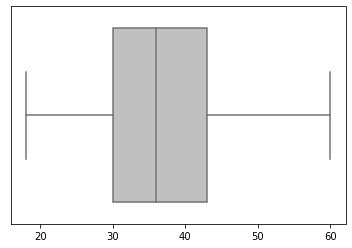

In [132]:
# From the range 18 to 60, 50% of the employees are in 30 to 43 Age range
sns.boxplot(data=df.Age, orient='h', color='silver')
plt.yticks([])
plt.show()

In [374]:
# Attrition for each Age
df_Attrition_Age = df.groupby(by=['Age','Attrition']).size().unstack(level=1)
df_Attrition_Age.sample(5) 

# printing just a sample, not the entire table

Attrition,No,Yes
Age,,
55,38.0,6.0
42,88.0,4.0
43,60.0,4.0
54,36.0,NaN
52,30.0,6.0


'There is comparitively higher attrition in the 26 to 33 age range'

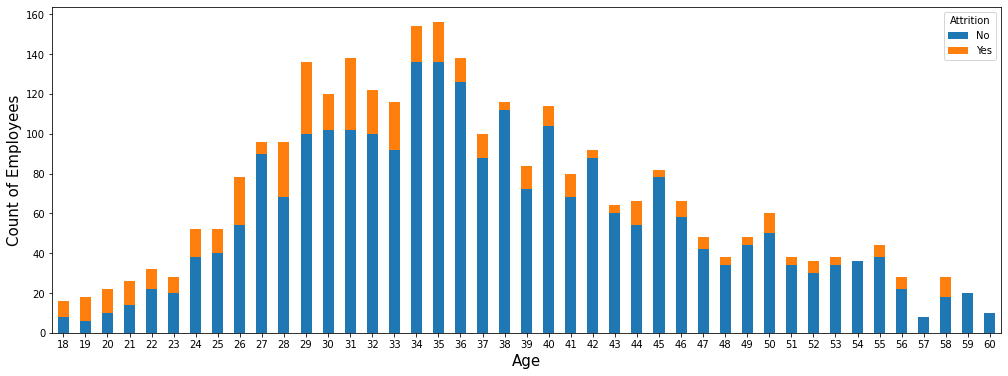

In [375]:
# Attrition countplot for each Age
df_Attrition_Age.plot(kind='bar', stacked = True,figsize=(17,6))
plt.xticks(rotation=0)
plt.ylabel("Count of Employees")

"""There is comparitively higher attrition in the 26 to 33 age range"""

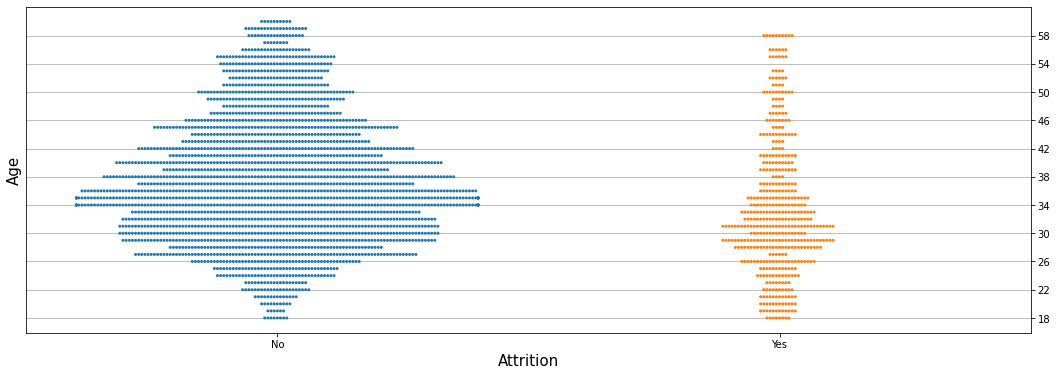

In [145]:
# swarmplot also confirms the same - """There is comparitively higher attrition in the 26 to 33 age range"""

fig,ax=plt.subplots(figsize=(18,6))
plt.grid()
sns.swarmplot(y='Age',x='Attrition',data=df,size=3, order=['No', 'Yes'])
ax.yaxis.tick_right()
plt.yticks(np.arange(18,61,4)); plt.show()

### Analysing the BusinessTravel column

In [53]:
# Attrition for each BusinessTravel category
df_BusinessTravel = pd.DataFrame(df.groupby(by=['BusinessTravel','Attrition']).size(), columns=['count'])
df_BusinessTravel

count
BusinessTravel    Attrition       
Non-Travel        No           276
                  Yes           24
Travel_Frequently No           416
                  Yes          138
Travel_Rarely     No          1774
                  Yes          312

In [54]:
for i ,j in df_BusinessTravel.iterrows():
    df_BusinessTravel.loc[i,'percentage'] = round(j[0]*100/len(df[df.BusinessTravel==i[0]]),2)
df_BusinessTravel.reset_index(inplace=True)
df_BusinessTravel.sort_values("Attrition", inplace=True)
df_BusinessTravel.reset_index(inplace=True,drop=True)
df_BusinessTravel

,BusinessTravel,Attrition,count,percentage
0,Non-Travel,No,276,92.00
1,Travel_Frequently,No,416,75.09
2,Travel_Rarely,No,1774,85.04
3,Non-Travel,Yes,24,8.00
4,Travel_Frequently,Yes,138,24.91
5,Travel_Rarely,Yes,312,14.96


In [ ]:
"""Most Employees 'Travel Rarely', Attrition Count also more in this category. 
But, Employees who 'Travel Frequently' have a higher chance of leaving ~25%."""

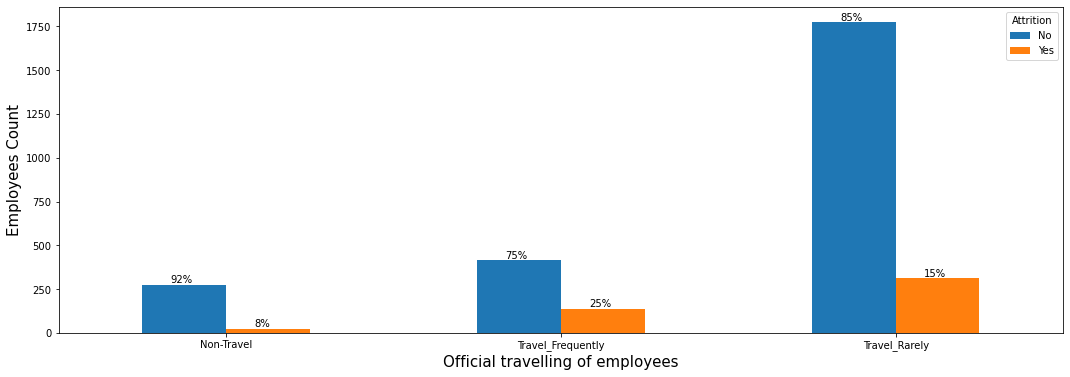

In [55]:
ax=df.groupby(by=['BusinessTravel','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=0)
i=0
plt.ylabel('Employees Count'); plt.xlabel('Official travelling of employees')

# for annotating the percentage values
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_BusinessTravel.iloc[i,3]), (x+width/3, y+height+10));    i+=1

### Analysing Attrition with BusinessTravel requirement for each Department

In [10]:
df_HR_BusinessTravel=df[df.Department=='Human Resources'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_RD_BusinessTravel =df[df.Department=='Research & Development'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_Sales_BusinessTravel=df[df.Department=='Sales'].groupby(['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_Dep_BTravel_all=[df_HR_BusinessTravel, df_RD_BusinessTravel, df_Sales_BusinessTravel]
df_Dep_BTravel_all

[Attrition            No   Yes
 BusinessTravel               
 Non-Travel         12.0   0.0
 Travel_Frequently  14.0   8.0
 Travel_Rarely      76.0  16.0,
 Attrition            No  Yes
 BusinessTravel              
 Non-Travel          178   16
 Travel_Frequently   290   74
 Travel_Rarely      1188  176,
 Attrition           No  Yes
 BusinessTravel             
 Non-Travel          86    8
 Travel_Frequently  112   56
 Travel_Rarely      510  120]

Text(0.5, 1.0, 'How is BusinessTravel Frequency contributing to Attrition in each Department?')

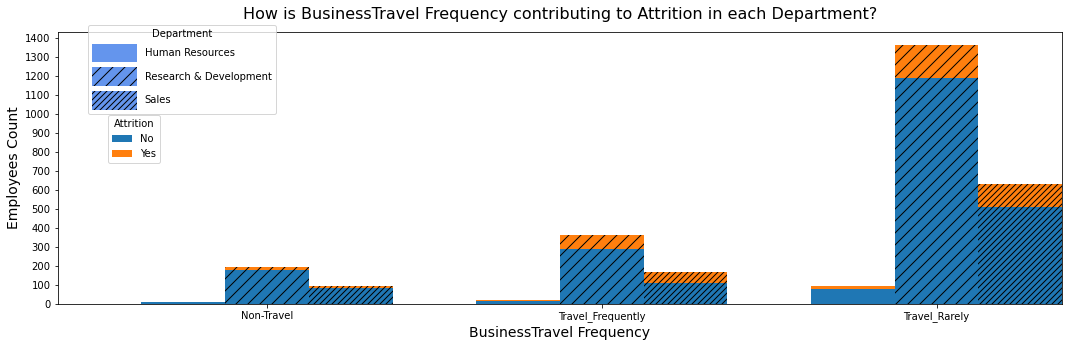

In [14]:
# no direct functions available to plot clusters of stacked bars
# using this code from https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas
axe=plt.subplot() 

for df_Dep_BTravel in df_Dep_BTravel_all: # a list of DataFrames
       df_Dep_BTravel.plot(kind="bar", figsize=(18,5), stacked=True,   ax=axe)
        
n_df = len(df_Dep_BTravel_all) # 3 DataFrames
n_col = len(df_Dep_BTravel_all[0].columns)  # 2 columns
n_ind = len(df_Dep_BTravel_all[0].index) # no. of rows in each DataFrame
H="/" # hatching pattern

h,l = axe.get_legend_handles_labels() # Return handles and labels for legend
# len(h) = n_col * n_df

for i in range(0, n_df * n_col, n_col): # i=0,2,4
    
    # enumerate is useful for obtaining an indexed list (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
    for j, pa in enumerate(h[i:i+n_col]): # for each DataFrame, we are taking the two handles (for two columns)
        
        # pa is a <BarContainer object of 3 artists>
        for rect in pa.patches: # rect -> Rectangle(xy=(-0.25, 0), width=0.5, height=12, angle=0)
            rect.set_width(0.25) # reduced the width from default 0.5 to 0.25
            
            # Rectangles for each Departments were overlapping at each BusinessTravel Level, so changing the 
            # left x-coordinates for 2nd & 3rd dfs
            rect.set_x(rect.get_x() + 0.25*(i/n_col)) 
            
            rect.set_hatch(H * i) # "/"*0-> '', "/"*1-> '/', "/"*2-> '//'

axe.set_xticks(np.arange(0.125,3,1)) # moving xticks location from 0,1,2 to 0.125,1.125,2.125
axe.set_xticklabels(["Non-Travel","Travel_Frequently","Travel_Rarely"], rotation = 0); 
axe.set_yticks(np.arange(0,1500,100))

labels=['Human Resources','Research & Development','Sales']
n=[]        
for i in range(n_df):
    n.append(axe.bar(0, 0, color="cornflowerblue", hatch=H*i*2))
# n is [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]

l1=axe.legend(h[:n_col], l[:n_col], loc=[.05, 0.52], title='Attrition') # passing handles, labels
plt.legend(n, labels, loc=[.03, 0.7], title='Department', handlelength=4.5, handleheight=2.5) 
axe.add_artist(l1) # all visible elements in a figure are subclasses of Artist

plt.xlabel("BusinessTravel Frequency", fontdict={'fontsize':14})
plt.ylabel("Employees Count", fontdict={'fontsize':14})
plt.title("How is BusinessTravel Frequency contributing to Attrition in each Department?", 
          fontdict={'fontsize':16}, 
          pad=13) # The offset of the title from the top of the axes, in points. 
                     # The standard size of points in matplotlib is 72 points per inch (ppi)

In [ ]:
"""Attrition is more in R&D, Sales, both Travel_Frequently and Travel_Rarely categories."""

### Analysing the DailyRate column

In [18]:
len(df.DailyRate.unique())

886

[]

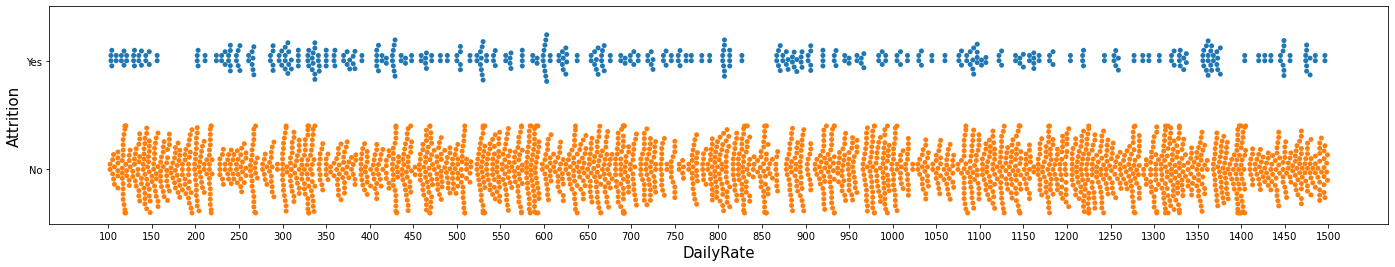

In [71]:
# DailyRate is a continous variable
plt.subplots(figsize=(24,4))
sns.swarmplot(x=df.DailyRate, y=df.Attrition)
plt.xticks(np.arange(100,1501,50))
plt.plot()

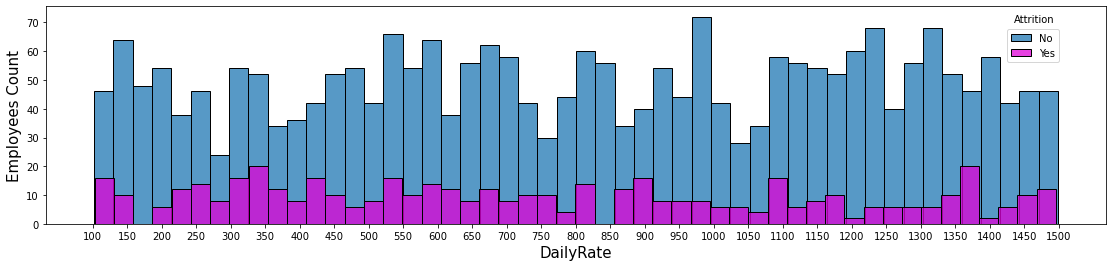

In [16]:
fig,ax=plt.subplots(figsize=(19,4))
sns.histplot(df[df.Attrition=='No'].DailyRate,kde=False, bins=50,label='No')
sns.histplot(df[df.Attrition=='Yes'].DailyRate,kde=False,bins=50,label='Yes', color='#DF01D7')
ax.annotate('Attrition',(1435,70)) # text, xy cordinates
plt.xticks(np.arange(100,1501,50)); plt.ylabel('Employees Count'); plt.legend(bbox_to_anchor=(.96, 0.92))

# No significant insights from DailyRate plots

count    2940.000000
mean      802.485714
std       403.440447
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64



[]

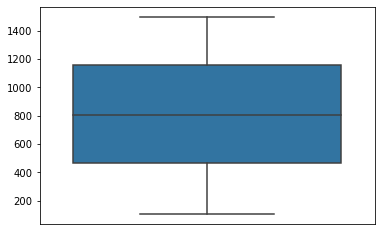

In [65]:
print(df.DailyRate.describe())
print()
sns.boxplot(data=df.DailyRate)
plt.xticks([])
plt.plot()

# 50% of the employees are in 465 to 1157 DailyRate range

### Analysing the Department column

In [88]:
# Employees in this dataset are from 3 different Departments
print(df.Department.unique())

['Sales' 'Research & Development' 'Human Resources']


In [277]:
# Attrition % in each Department

df_Department = pd.DataFrame(df.groupby(by=['Department','Attrition']).size(), columns=['Count'])
for i ,j in df_Department.iterrows():
    df_Department.loc[i,'Percentage in the respective Department'] = round(j[0]*100/len(df[df.Department==i[0]]),2)
df_Department.reset_index(inplace=True)
df_Department.sort_values("Attrition", inplace=True)
df_Department.reset_index(inplace=True,drop=True)
df_Department

,Department,Attrition,Count,Percentage in the respective Department
0,Human Resources,No,102,80.95
1,Research & Development,No,1656,86.16
2,Sales,No,708,79.37
3,Human Resources,Yes,24,19.05
4,Research & Development,Yes,266,13.84
5,Sales,Yes,184,20.63


In [ ]:
"""More people are leaving from R&D (in terms of count), but Attrition Percentage is more in Sales Department."""

Text(0.5, 0, 'Department of Employees')

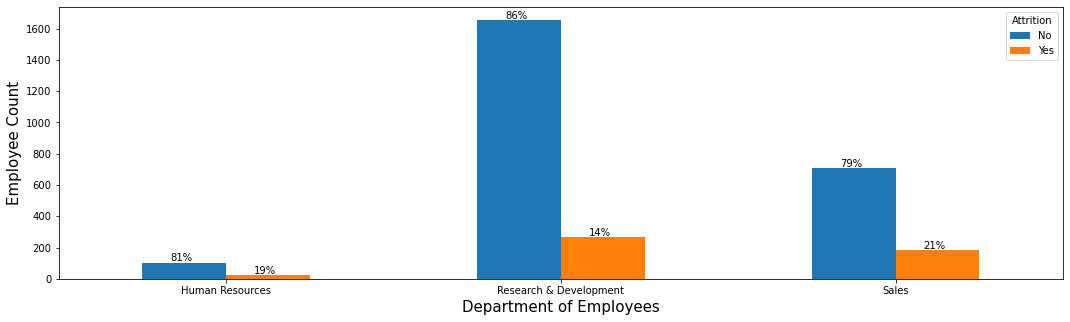

In [479]:
ax=df.groupby(by=['Department','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,5))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_Department.iloc[i,3]), (x+width/3, y+height+10));    i+=1
plt.xlabel("Department of Employees")

In [191]:
# How much is each Department's contribution towards overall Attrition?

df_Department_Attrition = pd.DataFrame(df[df.Attrition=='Yes'].groupby('Department').size(), columns=['Attrition Count'])
count=df_Department_Attrition['Attrition Count'].values
perc=[]
for i in range(len(count)):
    perc.append(round(count[i]*100/sum(count),2))
df_Department_Attrition['Percentage']= perc
df_Department_Attrition Department

"""Highest attrition count is from R&D Department, ~56% of overall attrition"""

,Attrition Count,Percentage
Department,,
Human Resources,24,5.06
Research & Development,266,56.12
Sales,184,38.82


#### Analysing attrition for different JobRoles in R&D Department

In [313]:
# Job Roles in Research & Development Department
print(df[df.Department=='Research & Development'].JobRole.unique())

['Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Research Director' 'Manager']


In [317]:
# count of Total Employees in each JobRole in Sales Department
df[df.Department=='Research & Development'].groupby(['JobRole']).size().sort_values()

JobRole
Manager                      108
Research Director            160
Healthcare Representative    262
Manufacturing Director       290
Laboratory Technician        518
Research Scientist           584
dtype: int64

In [377]:
dfRnDJobRolesAttrition=df[df.Department=='Research & Development'].groupby(['JobRole',"Attrition"]).size().unstack(level=1).sort_values('Yes', ascending=False)
dfRnDJobRolesAttrition

Attrition,No,Yes
JobRole,,
Laboratory Technician,394,124
Research Scientist,490,94
Manufacturing Director,270,20
Healthcare Representative,244,18
Manager,102,6
Research Director,156,4


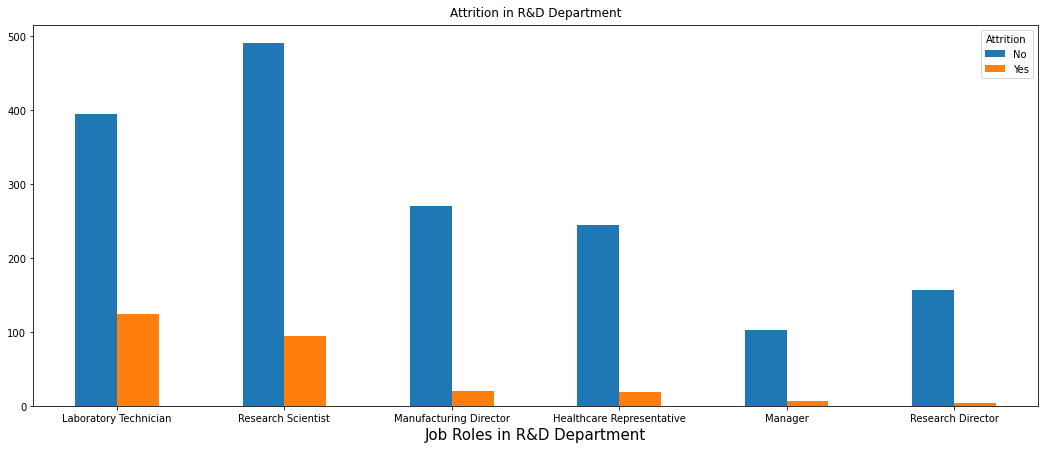

In [389]:
"""Is the Attrition uniform among different JobRoles in Research & Development Department"""

dfRnDJobRolesAttrition.plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); 
plt.xlabel('Job Roles in R&D Department')

"""in R&D Department, Attrition is more for Laboratory Technicians and Research Scientists."""

plt.title("Attrition in R&D Department",pad=9); plt.show()

In [202]:
# Count of Laboratory Technicians and Research Scientists from R&D Department who has left the company

df[ ((df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist')) 
   & (df.Department == 'Research & Development')  & (df.Attrition == 'Yes') ].shape[0]

218

In [201]:
# What is the percentage of Laboratory Technicians and Research Scientists from R&D Department out of the overall attrition?

round(218*100/474)

46

In [287]:
# Is Travel a reason for high attrition by Laboratory Technicians and Research Scientists in R&D Department?

df_LabTechAndRS_Attrition_Travel = pd.DataFrame(
    df[ ((df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist')) 
   & (df.Department == 'Research & Development')  & (df.Attrition == 'Yes') ].groupby("BusinessTravel").size(), 
    columns=['Attrition Count'])

# finding percentage
count =df_LabTechAndRS_Attrition_Travel['Attrition Count'].values
perc=[]
for i in range(len(count)):
    perc.append(round(count[i]*100/df.Attrition.value_counts()[1],2))
df_LabTechAndRS_Attrition_Travel['Percentage contribution towards overall attrition']= perc
df_LabTechAndRS_Attrition_Travel 

,Attrition Count,Percentage contribution towards overall attrition
BusinessTravel,,
Non-Travel,12,2.53
Travel_Frequently,62,13.08
Travel_Rarely,144,30.38


In [460]:
(62+144)/218

0.944954128440367

In [220]:
# Are Laboratory Technician and Research Scientist JobRoles only in R&D Department?

df[ ((df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist')) 
   & (df.Department != 'Research & Development') ].shape[0]

# Yes, Laboratory Technician and Research Scientist JobRoles are only in R&D Department.

0

In [289]:
# What is the percentage of Laboratory Technicians and Research Scientists from R&D Department with OverTime, 
# out of the overall attrition?

df_LabTechAndRS_Attrition_OverTime=df[ ((df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist')) 
   & (df.Attrition == 'Yes') ].groupby('OverTime').size()
print(df_LabTechAndRS_Attrition_OverTime)
print()
print(f'{round(df_LabTechAndRS_Attrition_OverTime[1]*100/474)}% out of overall attrition')

OverTime
No      90
Yes    128
dtype: int64

27.0% out of overall attrition


In [ ]:
"""56.12% (266 out of 474) of overall attrition from R&D Department,
46% (218 out of 474) of overall attrition by Laboratory Technicians and Research Scientists in R&D Department,
30% (144 out of 474) of overall attrition by Laboratory Technicians and Research Scientists who travel rarely, 
27% (128 out of 474) of overall attrition by Laboratory Technicians and Research Scientists with OverTime."""

In [223]:
df[ ((df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist'))
   & (df.Attrition == 'Yes')
   & (df.OverTime == 'Yes')].groupby('BusinessTravel').size()

BusinessTravel
Non-Travel            8
Travel_Frequently    38
Travel_Rarely        82
dtype: int64

In [224]:
"""17% (82 out of 474) of overall attrition by Laboratory Technicians and Research Scientists with OverTime and Travelled Rarely."""
round(82*100/474)

17

#### Analysing attrition for different JobRoles in Sales Department

In [312]:
# Job Roles in Sales Department
print(df[df.Department=='Sales'].JobRole.unique())

['Sales Executive' 'Manager' 'Sales Representative']


In [209]:
# count of Total Employees in each JobRole in Sales Department
df[df.Department=='Sales'].groupby(['JobRole']).size()

JobRole
Manager                  74
Sales Executive         652
Sales Representative    166
dtype: int64

'Attrition is less for Managers, but much higher for Sales Executives and Represenativess.'

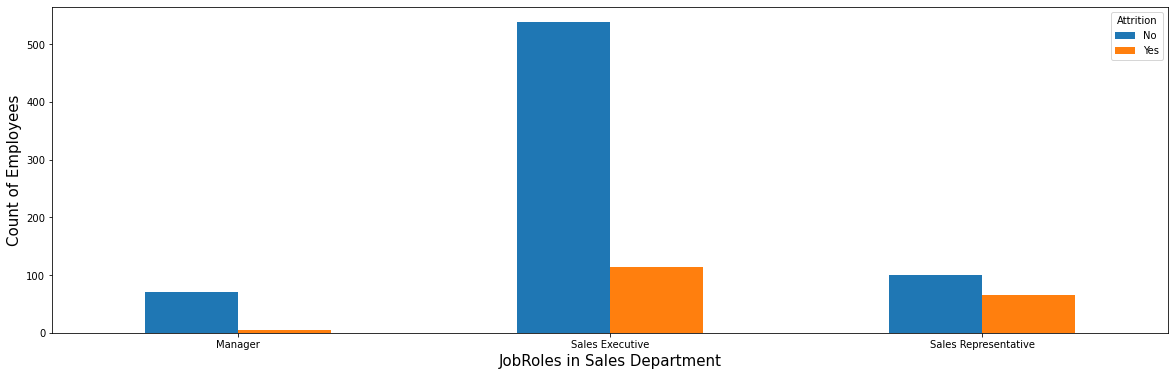

In [97]:
"""Is Attrition high for all Job roles in Sales Department?"""

df[df.Department=='Sales'].groupby(['JobRole',"Attrition"]).size().unstack(level=1).plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=0); plt.ylabel("Count of Employees"); plt.xlabel("JobRoles in Sales Department")

"""Attrition is less for Sales Managers, but much higher for Sales Executives and Represenativess."""

In [226]:
# Are Sales Executives and Sales Representatives only in Sales Department?

df[((df.JobRole=='Sales Executive') | (df.JobRole=='Sales Representative')) & (df.Department !='Sales')].shape[0]

# Yes, Sales Executives and Sales Representatives are only in Sales Department.

0

In [230]:
# Is OverTime and BusinessTravel a major reason for Attrition among Sales Executives and Sales Representatives?

df[((df.JobRole=='Sales Executive') | (df.JobRole=='Sales Representative'))].groupby(['OverTime','BusinessTravel']).size()

OverTime  BusinessTravel   
No        Non-Travel            68
          Travel_Frequently    126
          Travel_Rarely        388
Yes       Non-Travel            20
          Travel_Frequently     38
          Travel_Rarely        178
dtype: int64

#### Taking 4 High Attrition Job Roles - Laboratory Technicians, Sales Representatives, Research Scientists and Sales Executives

In [291]:
df_HighAttritionJobRoles = df[(df.JobRole=='Laboratory Technician') | (df.JobRole=='Research Scientist') | 
                              (df.JobRole=='Sales Executive') | (df.JobRole=='Sales Representative')]
df_HighAttritionJobRoles.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0


In [465]:
# 84% of overall attrition by this group
df_HighAttritionJobRoles[df_HighAttritionJobRoles.Attrition=='Yes'].shape[0]/474

0.8396624472573839

In [467]:
# overall strength of this group
df_HighAttritionJobRoles.shape[0]/df.shape[0]

0.6530612244897959

#### Analysing Business Travel Frequencies for these 4 JobRoles

In [295]:
df_LabTech_BusinessTravel= df_HighAttritionJobRoles[df_HighAttritionJobRoles.JobRole=='Laboratory Technician'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_ResearchScientist_BusinessTravel = df_HighAttritionJobRoles[df_HighAttritionJobRoles.JobRole=='Research Scientist'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_SalesExec_BusinessTravel= df_HighAttritionJobRoles[df_HighAttritionJobRoles.JobRole=='Sales Executive'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)
df_SalesRep_BusinessTravel= df_HighAttritionJobRoles[df_HighAttritionJobRoles.JobRole=='Sales Representative'].groupby(
    ['BusinessTravel','Attrition']).size().unstack().replace(np.nan,0)

df_MoreAttritionJobRoles_BTravel=[df_LabTech_BusinessTravel, df_ResearchScientist_BusinessTravel, 
                                  df_SalesExec_BusinessTravel,                                  df_SalesRep_BusinessTravel]
df_MoreAttritionJobRoles_BTravel

[Attrition           No  Yes
 BusinessTravel             
 Non-Travel          52    4
 Travel_Frequently   70   32
 Travel_Rarely      272   88,
 Attrition           No  Yes
 BusinessTravel             
 Non-Travel          48    8
 Travel_Frequently   78   30
 Travel_Rarely      364   56,
 Attrition           No  Yes
 BusinessTravel             
 Non-Travel          70    8
 Travel_Frequently   92   26
 Travel_Rarely      376   80,
 Attrition            No   Yes
 BusinessTravel               
 Non-Travel         10.0   0.0
 Travel_Frequently  16.0  30.0
 Travel_Rarely      74.0  36.0]

In [ ]:
"""Sales Representatives who travel Frequently have a very higher chance of leaving - close to 65%"""

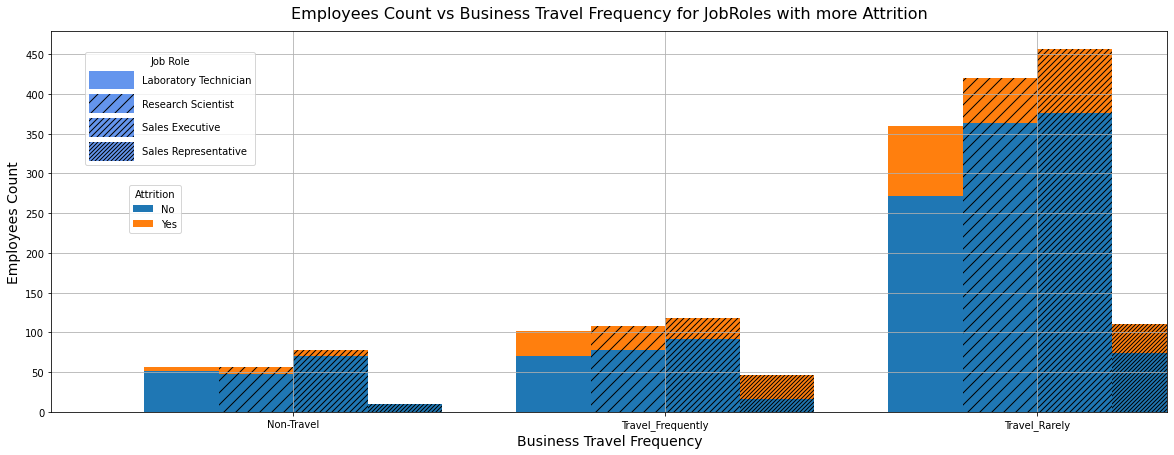

In [286]:
axe=plt.subplot() # Add a subplot to the current figure

for df in df_MoreAttritionJobRoles_BTravel: # a list of DataFrames
       df.plot(kind="bar", figsize=(20,7), 
               stacked=True,   ax=axe,grid=True)
        
n_df = len(df_MoreAttritionJobRoles_BTravel) # 4 DataFrames
n_col = len(df_MoreAttritionJobRoles_BTravel[0].columns)  # 2 columns
n_ind = len(df_MoreAttritionJobRoles_BTravel[0].index) # 3 rows representing 3 BusinessTravel frequencies
H="/" # hatching pattern

h,l = axe.get_legend_handles_labels() # Return handles and labels for legend
# len(h) = n_col * n_df

for i in range(0, n_df * n_col, n_col): # i=0,2,4,6
     
    # enumerate is useful for obtaining an indexed list (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
    for j, pa in enumerate(h[i:i+n_col]): # for each DataFrame, we are taking the two handles (for two columns)
       
        # pa is a <BarContainer object of 3 artists> representing 3 BusinessTravel frequencies
        for rect in pa.patches: # rect -> Rectangle(xy=(-0.25, 0), width=0.5, height=52, angle=0)
            
            rect.set_width(0.2) # reduced the width from default 0.5 to 0.2
            
            # Rectangles for each JobRoles were overlapping at each BusinessTravel level, so changing the left x-coordinates for 2nd, 3rd and 4th dfs
            rect.set_x(rect.get_x() + 0.2*(i/n_col)) 
            
            rect.set_hatch(H * i) # "/"*0-> '', "/"*1-> '/', "/"*2-> '//'

axe.set_xticks(np.arange(0.15,3,1)) # moving xticks from 0,1,2 to 0.15,1.15,2.15
axe.set_xticklabels(["Non-Travel", "Travel_Frequently", "Travel_Rarely"], rotation = 0); 
axe.set_yticks(np.arange(0,501,50))

labels=['Laboratory Technician','Research Scientist','Sales Executive',"Sales Representative"]
n=[]        
for i in range(n_df):
    n.append(axe.bar(0, 0, color="cornflowerblue", hatch=H*i*2))
# n is [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]

l1=axe.legend(h[:n_col], l[:n_col], loc=[.07, 0.47], title='Attrition') # passing handles, labels
plt.legend(n, labels, loc=[.03, 0.65], title='Job Role', handlelength=4.5, handleheight=2.5) 
axe.add_artist(l1) # all visible elements in a figure are subclasses of Artist

plt.xlabel("Business Travel Frequency", fontdict={'fontsize':14})
plt.ylabel("Employees Count", fontdict={'fontsize':14})
plt.title("Employees Count vs Business Travel Frequency for JobRoles with more Attrition", fontdict={'fontsize':16},           pad=13)

plt.show() # Display all figures.

### Analysing the DistanceFromHome column

In [167]:
df.DistanceFromHome.describe()

count    2940.000000
mean        9.192517
std         8.105485
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [241]:
df[df.Attrition=='Yes'].DistanceFromHome.describe()

count    474.000000
mean      10.632911
std        8.443586
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [242]:
# Atleast one Attrition from all the DistanceFromHome values
# But from below Histogram, the Attrition distribution is not normal
np.sort(df[df.Attrition=='Yes'].DistanceFromHome.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

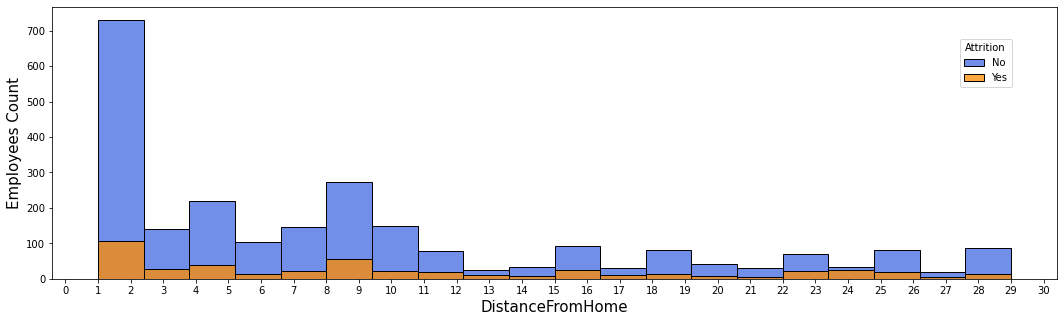

In [240]:
'""More employees stay closer to Work""'

fig,ax=plt.subplots(figsize=(18,5))
sns.histplot(df[df.Attrition=='No'].DistanceFromHome,kde=False,bins=20, label='No', color='royalblue')
sns.histplot(df[df.Attrition=='Yes'].DistanceFromHome,kde=False,bins=20, label='Yes', color='darkorange')
plt.xticks(np.arange(0,31,1))
plt.ylabel('Employees Count'); plt.legend(bbox_to_anchor=(.96, 0.9), title='Attrition')

### Analysing the Education column

In [186]:
df.Education.unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [18]:
df_Education = pd.DataFrame(df.groupby(by=['Education','Attrition']).size(), columns=['count'])
for i ,j in df_Education.iterrows():
    df_Education.loc[i,'percentage'] = round(j[0]*100/len(df[df.Education==i[0]]),2)
df_Education.reset_index(inplace=True)
df_Education.sort_values("Attrition", inplace=True)
df_Education.reset_index(inplace=True,drop=True)
df_Education

,Education,Attrition,count,percentage
0,1,No,278,81.76
1,2,No,476,84.40
2,3,No,946,82.69
3,4,No,680,85.43
4,5,No,86,89.58
5,1,Yes,62,18.24
6,2,Yes,88,15.60
7,3,Yes,198,17.31
8,4,Yes,116,14.57
9,5,Yes,10,10.42


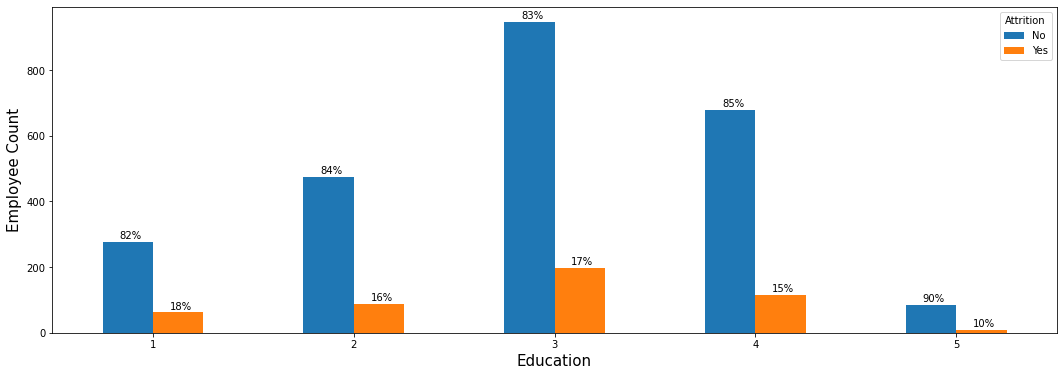

In [20]:
# Attrition percentage ranges from 10 to 18% for different Education Ratings
ax=df.groupby(by=['Education','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_Education.iloc[i,3]), (x+width/3, y+height+10))
    i+=1

### Analysing the EducationField column

In [281]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [245]:
df_EducationField = pd.DataFrame(df.groupby(by=['EducationField','Attrition']).size(), columns=['count'])
for i ,j in df_EducationField.iterrows():
    df_EducationField.loc[i,'percentage in respective EducationField'] = round(j[0]*100/len(df[df.EducationField==i[0]]),2)
df_EducationField.reset_index(inplace=True)
df_EducationField.sort_values("Attrition", inplace=True)
df_EducationField.reset_index(inplace=True,drop=True)
df_EducationField

,EducationField,Attrition,count,percentage in respective EducationField
0,Human Resources,No,40,74.07
1,Life Sciences,No,1034,85.31
2,Marketing,No,248,77.99
3,Medical,No,802,86.42
4,Other,No,142,86.59
5,Technical Degree,No,200,75.76
6,Human Resources,Yes,14,25.93
7,Life Sciences,Yes,178,14.69
8,Marketing,Yes,70,22.01
9,Medical,Yes,126,13.58


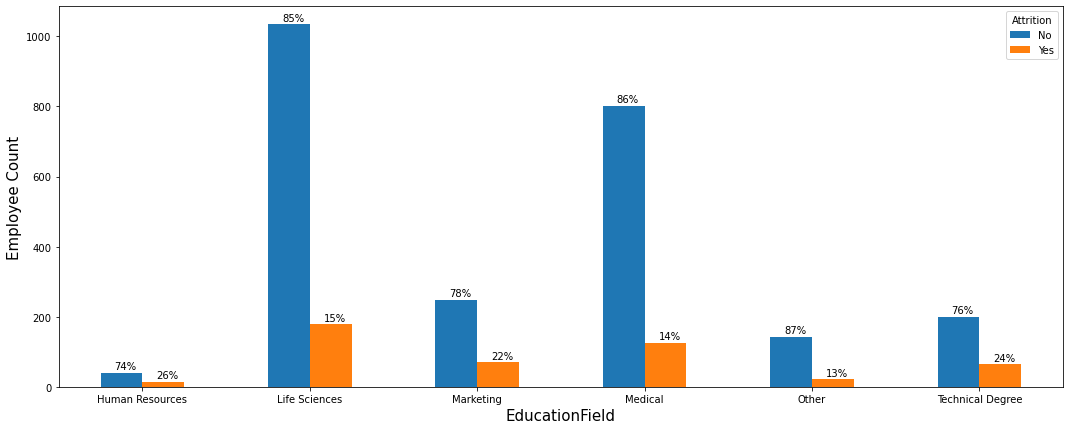

In [246]:
"""Attrition count is more in Life Science field, but Attrition percentage is more in Human Resources (26%)."""

ax=df.groupby(by=['EducationField','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_EducationField.iloc[i,3]), (x+width/3, y+height+10));    i+=1

#### Education vs EducationField vs Attrition 

In [65]:
df_Education_HR=df[df.EducationField=='Human Resources'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_LifeSciences =df[df.EducationField=='Life Sciences'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_Marketing=df[df.EducationField=='Marketing'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_Medical=df[df.EducationField=='Medical'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_Other=df[df.EducationField=='Other'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_TechDegree=df[df.EducationField=='Technical Degree'].groupby(['Education','Attrition']).size().unstack().replace(np.nan,0)
df_Education_EduField_all= [df_Education_HR, df_Education_LifeSciences, df_Education_Marketing, df_Education_Medical, df_Education_Other, df_Education_TechDegree]
df_Education_EduField_all

[Attrition    No  Yes
 Education           
 1           2.0  2.0
 2           4.0  0.0
 3          24.0  8.0
 4           8.0  2.0
 5           2.0  2.0,
 Attrition   No  Yes
 Education          
 1          118   16
 2          196   36
 3          392   74
 4          296   50
 5           32    2,
 Attrition  No  Yes
 Education         
 1          20    8
 2          36   12
 3          88   30
 4          86   18
 5          18    2,
 Attrition     No   Yes
 Education             
 1          106.0  20.0
 2          168.0  30.0
 3          316.0  50.0
 4          182.0  26.0
 5           30.0   0.0,
 Attrition    No   Yes
 Education            
 1           6.0   4.0
 2          36.0   2.0
 3          44.0   4.0
 4          54.0  12.0
 5           2.0   0.0,
 Attrition  No  Yes
 Education         
 1          26   12
 2          36    8
 3          82   32
 4          54    8
 5           2    4]

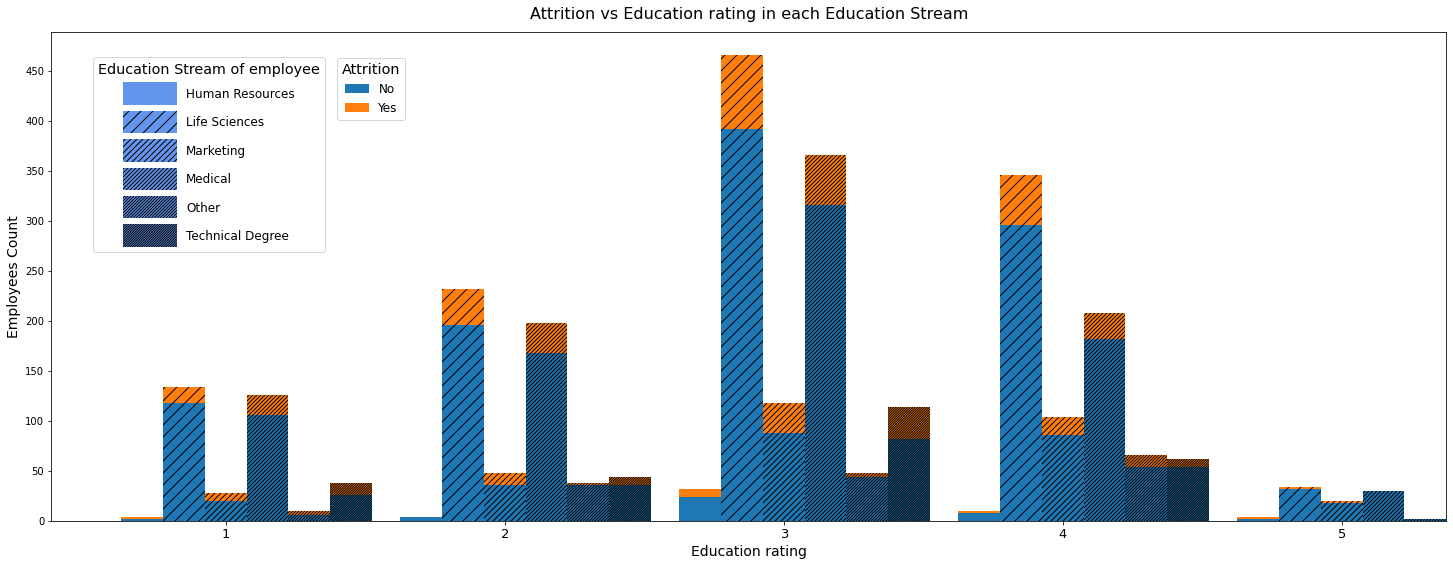

In [143]:
# https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

axe=plt.subplot() # Add a subplot to the current figure

for df in df_Education_EduField_all: # a list of DataFrames
       df.plot(kind="bar", figsize=(25,9), 
               stacked=True,   ax=axe)
        
n_df = len(df_Education_EduField_all) # 6 DataFrames
n_col = len(df_Dep_BTravel_all[0].columns)  # 2 columns
n_ind = len(df_Dep_BTravel_all[0].index) # no. of rows in each DataFrame ie 5
H="/" # hatching pattern

h,l = axe.get_legend_handles_labels() # Return handles and labels for legend
# len(h) = n_col * n_df

for i in range(0, n_df * n_col, n_col): # i=0,2,4,6,8,10
    
    # enumerate is useful for obtaining an indexed list (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
    for j, pa in enumerate(h[i:i+n_col]): # for each DataFrame, we are taking the two handles (for two columns)
       
        # pa is a <BarContainer object of 5 artists>
        for rect in pa.patches: # rect -> Rectangle(xy=(-0.25, 0), width=0.5, height=2, angle=0)
            rect.set_width(0.15) # reduced the width from default 0.5 to 0.15
            
            # without this, the rectangles will be overlapping at each Education Ratings
            rect.set_x(rect.get_x() + 0.15*(i/n_col)) 
            
            rect.set_hatch(H * i) # "/"*0-> '', "/"*1-> '/', "/"*2-> '//'

axe.set_xticks(np.arange(0.125,5,1)) # moving xticks location from 0,1,2,3,4 to 0.125,1.125,2.125,3.125,4.125
axe.set_xticklabels([1,2,3,4,5], fontdict={'fontsize':13}, rotation = 0); 
axe.set_yticks(np.arange(0,501,50))


labels=['Human Resources','Life Sciences','Marketing','Medical','Other','Technical Degree']
n=[]        
for i in range(n_df):
    n.append(axe.bar(0, 0, color="cornflowerblue", hatch=H*i*2))
# n is List of 6 <BarContainer object of 1 artists>

# passing handles, labels
l1=axe.legend(h[:n_col], l[:n_col], loc=[.205, 0.82], fontsize="large", title='Attrition', title_fontsize ="x-large") 
plt.legend(n, labels, loc=[.03, 0.55], title='Education Stream of employee',title_fontsize ="x-large", fontsize="large", 
           handlelength=4.5,           handleheight=2.5) 
axe.add_artist(l1) # all visible elements in a figure are subclasses of Artist

plt.xlabel("Education rating", fontdict={'fontsize':14})
plt.ylabel("Employees Count", fontdict={'fontsize':14})
plt.title("Attrition vs Education rating in each Education Stream", fontdict={'fontsize':16},pad=13) 

plt.show() # Display all figures.

### Analysing the EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance columns

In [392]:
df_EnvironmentSatisfaction = pd.DataFrame(df.groupby(by=['EnvironmentSatisfaction','Attrition']).size(), columns=['count'])
for i ,j in df_EnvironmentSatisfaction.iterrows():
    df_EnvironmentSatisfaction.loc[i,'percentage'] = round(j[0]*100/len(df[df.EnvironmentSatisfaction==i[0]]),2)
df_EnvironmentSatisfaction.reset_index(inplace=True)
df_EnvironmentSatisfaction.sort_values("Attrition", inplace=True)
df_EnvironmentSatisfaction.reset_index(inplace=True,drop=True)
df_EnvironmentSatisfaction

,EnvironmentSatisfaction,Attrition,count,percentage
0,1,No,424,74.65
1,2,No,488,85.02
2,3,No,782,86.31
3,4,No,772,86.55
4,1,Yes,144,25.35
5,2,Yes,86,14.98
6,3,Yes,124,13.69
7,4,Yes,120,13.45


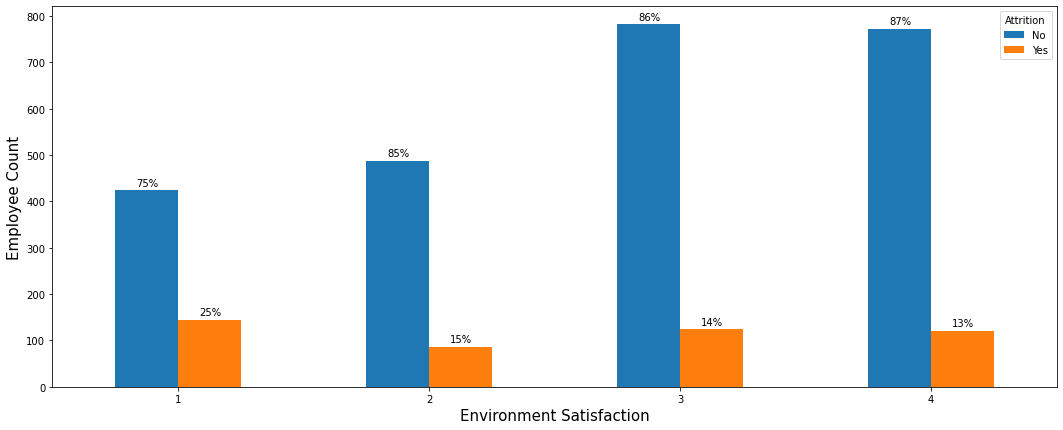

In [453]:
# Job Environment Satisfaction of employee
ax=df.groupby(by=['EnvironmentSatisfaction','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); 
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_EnvironmentSatisfaction.iloc[i,3]), (x+width/3, y+height+10))
    i+=1
plt.xlabel('Environment Satisfaction', fontdict={'fontsize':15})
plt.ylabel('Employee Count', fontdict={'fontsize':15})
plt.show()

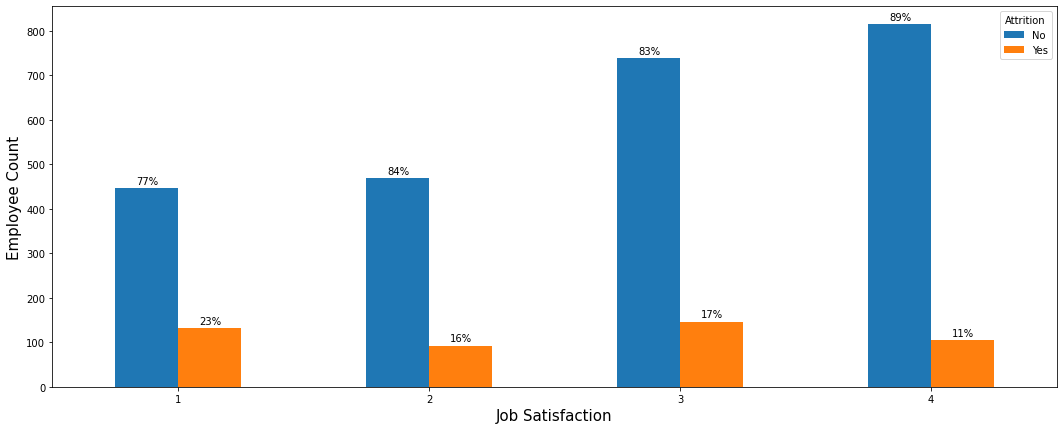

In [454]:
# Job Satisfaction of employee
df_JobSatisfaction = pd.DataFrame(df.groupby(by=['JobSatisfaction','Attrition']).size(), columns=['count'])
for i ,j in df_JobSatisfaction.iterrows():
    df_JobSatisfaction.loc[i,'percentage'] = round(j[0]*100/len(df[df.JobSatisfaction==i[0]]),2)
df_JobSatisfaction.reset_index(inplace=True)
df_JobSatisfaction.sort_values("Attrition", inplace=True)
df_JobSatisfaction.reset_index(inplace=True,drop=True)

ax=df.groupby(by=['JobSatisfaction','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); 
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_JobSatisfaction.iloc[i,3]), (x+width/3, y+height+10));    i+=1
plt.xlabel('Job Satisfaction', fontdict={'fontsize':15})
plt.ylabel('Employee Count', fontdict={'fontsize':15})
plt.show()

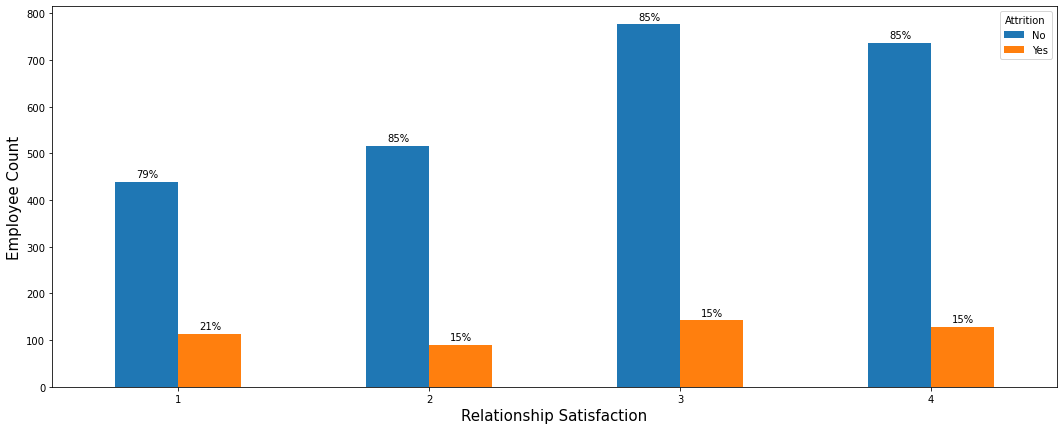

In [455]:
# RelationshipSatisfaction of employees with their Managers
df_RelationshipSatisfaction = pd.DataFrame(df.groupby(by=['RelationshipSatisfaction','Attrition']).size(), columns=['count'])
for i ,j in df_RelationshipSatisfaction.iterrows():
    df_RelationshipSatisfaction.loc[i,'percentage'] = round(j[0]*100/len(df[df.RelationshipSatisfaction==i[0]]),2)
df_RelationshipSatisfaction.reset_index(inplace=True)
df_RelationshipSatisfaction.sort_values("Attrition", inplace=True)
df_RelationshipSatisfaction.reset_index(inplace=True,drop=True)

ax=df.groupby(by=['RelationshipSatisfaction','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); 
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_RelationshipSatisfaction.iloc[i,3]), (x+width/3, y+height+10));    i+=1
plt.xlabel('Relationship Satisfaction', fontdict={'fontsize':15})
plt.ylabel('Employee Count', fontdict={'fontsize':15})
plt.show()

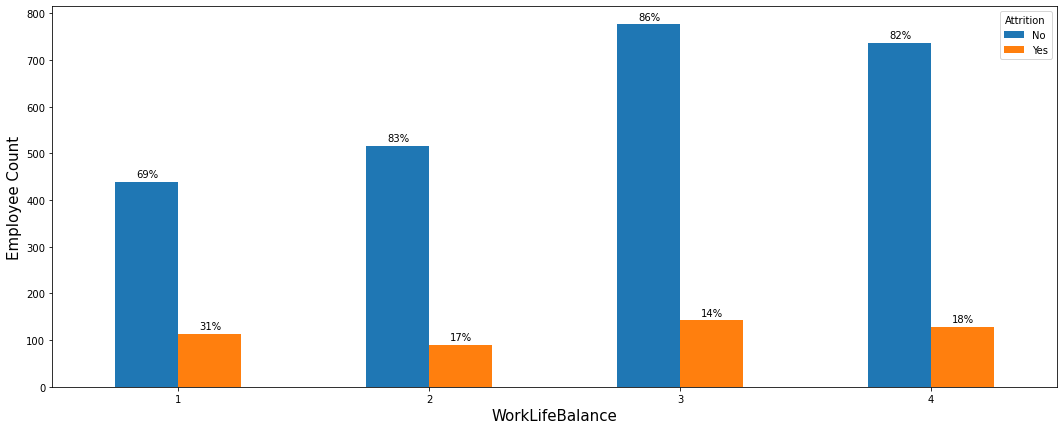

In [456]:
# WorkLifeBalance of employees with their Managers
df_WorkLifeBalance = pd.DataFrame(df.groupby(by=['WorkLifeBalance','Attrition']).size(), columns=['count'])
for i ,j in df_WorkLifeBalance.iterrows():
    df_WorkLifeBalance.loc[i,'percentage'] = round(j[0]*100/len(df[df.WorkLifeBalance==i[0]]),2)
df_WorkLifeBalance.reset_index(inplace=True)
df_WorkLifeBalance.sort_values("Attrition", inplace=True)
df_WorkLifeBalance.reset_index(inplace=True,drop=True)

ax=df.groupby(by=['RelationshipSatisfaction','Attrition']).size().unstack(level=1).plot(kind='bar',figsize=(18,7))
plt.xticks(rotation=0); 
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_WorkLifeBalance.iloc[i,3]), (x+width/3, y+height+10));    i+=1
plt.xlabel('WorkLifeBalance', fontdict={'fontsize':15})
plt.ylabel('Employee Count', fontdict={'fontsize':15})
plt.show()

In [ ]:
"""Attrition percentage is more for EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction or WorkLifeBalance = 1"""

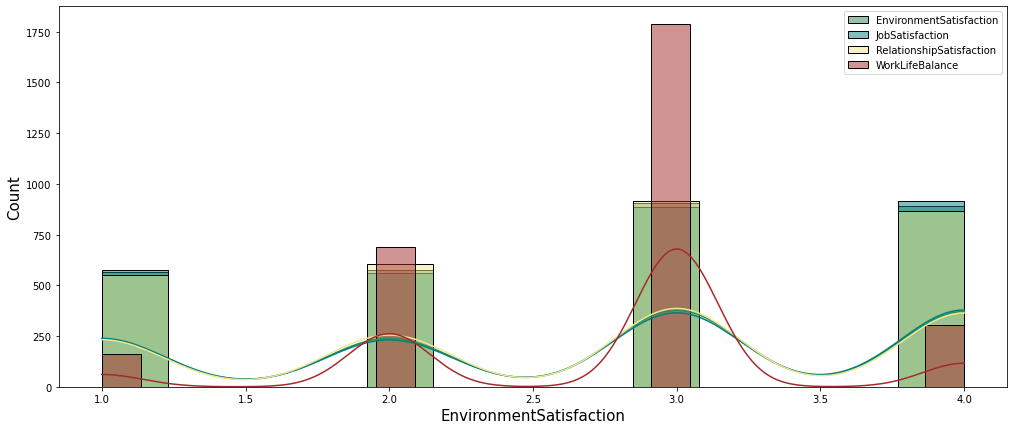

In [504]:
plt.subplots(figsize=(17,7))
sns.histplot(df.EnvironmentSatisfaction,label='EnvironmentSatisfaction', kde=True, color='seagreen')
sns.histplot(df.JobSatisfaction,label='JobSatisfaction', kde=True, color='teal')
sns.histplot(df.RelationshipSatisfaction, label="RelationshipSatisfaction", kde=True, color='khaki')
sns.histplot(df.WorkLifeBalance, label="WorkLifeBalance", kde=True, color='brown'); plt.legend() 
# EnvironmentSatisfaction, JobSatisfaction and RelationshipSatisfaction have similar distribution 

### Analysing the Gender column

In [8]:
df_Gender = pd.DataFrame(df.groupby(by=['Gender','Attrition']).size(), columns=['count'])
for i ,j in df_Gender.iterrows():
    df_Gender.loc[i,'percentage'] = round(j[0]*100/len(df[df.Gender==i[0]]),2)
df_Gender.reset_index(inplace=True)
df_Gender.sort_values("Attrition", inplace=True)
df_Gender.reset_index(inplace=True,drop=True)
df_Gender

,Gender,Attrition,count,percentage
0,Female,No,1002,85.20
1,Male,No,1464,82.99
2,Female,Yes,174,14.80
3,Male,Yes,300,17.01


In [306]:
len(df[df.Gender=='Female']), len(df[df.Gender=='Male']), len(df[df.Gender=='Female'])/len(df[df.Gender=='Male'])

(1176, 1764, 0.6666666666666666)

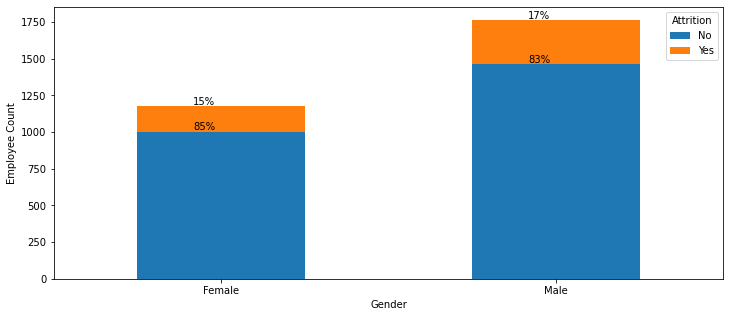

In [9]:
"""Female Employees: Male Employees count ratio = 2:3"""

ax=df.groupby(by=['Gender','Attrition']).size().unstack(level=1).plot(kind='bar',stacked=True,figsize=(12,5))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_Gender.iloc[i,3]), (x+width/3, y+height+10))
    i+=1

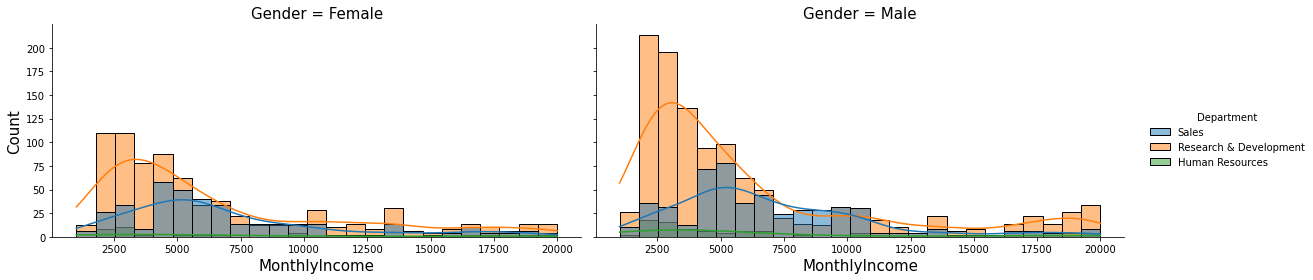

In [272]:
# Gender count difference is more in the Lower Monthly Income Levels
sns.displot(df, x="MonthlyIncome", col="Gender",kde=True, hue='Department', height=4, aspect=2)

### Analysing the HourlyRate column

In [309]:
len(df.HourlyRate.unique())

71

In [319]:
print(sorted(df.HourlyRate.unique()))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


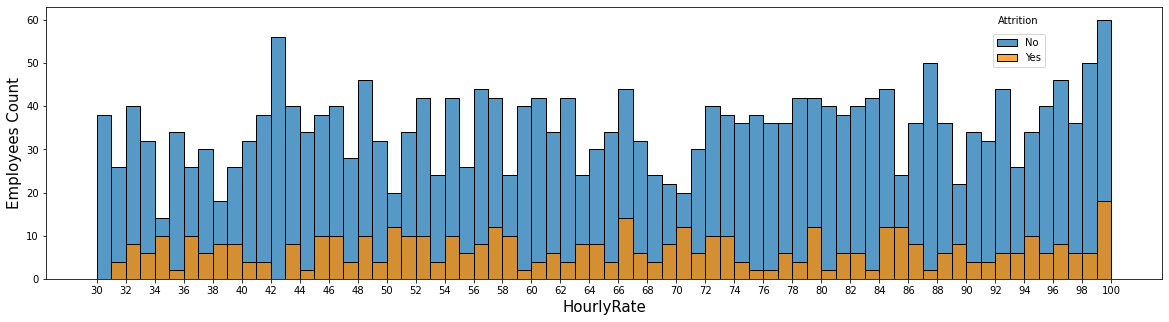

In [276]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(df[df.Attrition=='No'].HourlyRate,kde=False, bins=70,label='No')
sns.histplot(df[df.Attrition=='Yes'].HourlyRate,kde=False,bins=69,label='Yes', color='darkorange')
ax.annotate('Attrition',(92.2,59)) # text, xy cordinates
plt.xticks(np.arange(30,101,2)); plt.ylabel('Employees Count');
plt.legend(bbox_to_anchor=(.9, 0.92))

### Analysing the JobInvolvement column

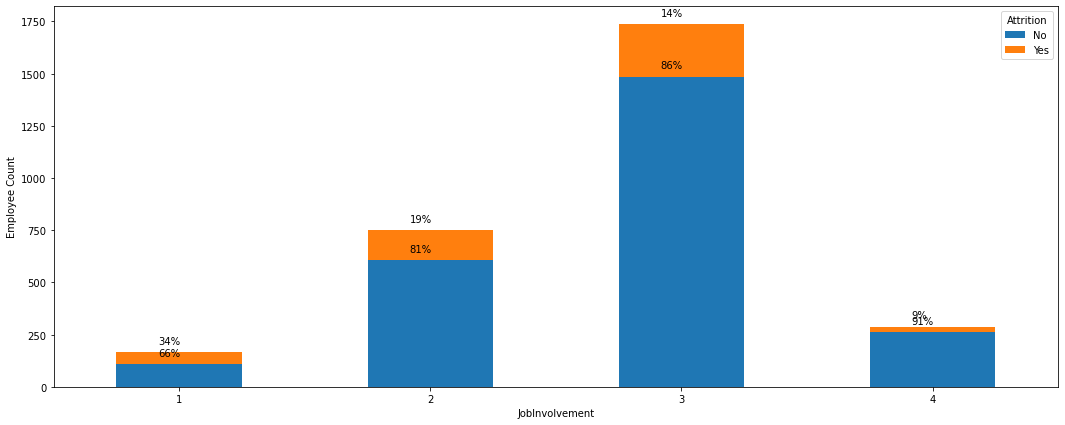

In [228]:
# Engagement in the Job (4 ratings 1,2,3,4)
df_JobInvolvement = pd.DataFrame(df.groupby(by=['JobInvolvement','Attrition']).size(), columns=['count'])
for i ,j in df_JobInvolvement.iterrows():
    df_JobInvolvement.loc[i,'percentage'] = round(j[0]*100/len(df[df.JobInvolvement==i[0]]),2)
df_JobInvolvement.reset_index(inplace=True)   
df_JobInvolvement.sort_values("Attrition", inplace=True)
df_JobInvolvement.reset_index(inplace=True,drop=True)
ax=df.groupby(by=['JobInvolvement','Attrition']).size().unstack(level=1).plot(kind='bar',stacked=True,figsize=(18,7))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_JobInvolvement.iloc[i,3]), (x+width/3, y+height+39))
    i+=1

In [229]:
# JobInvolvement==1 has people representing from all Departments

df[df.JobInvolvement==1].Department.unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [230]:
# JobInvolvement==1 with Attrition has people representing from all Departments

df[(df.JobInvolvement==1) & (df.Attrition=='Yes')].Department.unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [298]:
# Even though R&D people are more in JobInvolvement 1 category, Attrition is higher for Sales people (~52%)

print(df[df.JobInvolvement==1].groupby('Department').size())
print()
print(df[(df.JobInvolvement==1) & (df.Attrition=='Yes')].groupby('Department').size())

Department
Human Resources             6
Research & Development    102
Sales                      58
dtype: int64

Department
Human Resources            2
Research & Development    24
Sales                     30
dtype: int64


#### Plotting attrition vs Job Involvement for each Department

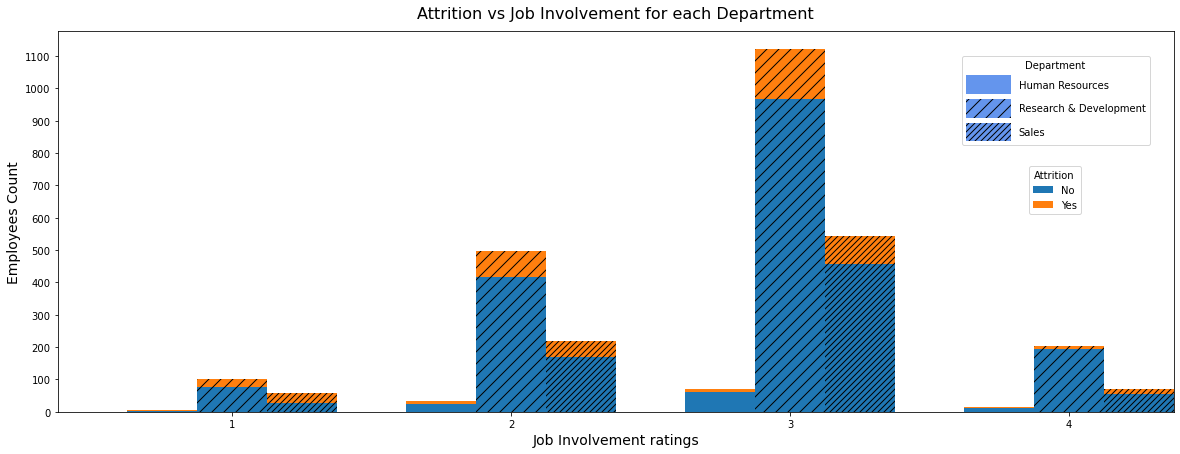

In [302]:
df_HR_JobInvolvement=df[df.Department=='Human Resources'].groupby(['JobInvolvement','Attrition']).size().unstack().replace(np.nan,0)
df_RD_JobInvolvement =df[df.Department=='Research & Development'].groupby(['JobInvolvement','Attrition']).size().unstack().replace(np.nan,0)
df_Sales_JobInvolvement =df[df.Department=='Sales'].groupby(['JobInvolvement','Attrition']).size().unstack().replace(np.nan,0)
df_JobInvolvement_Dep_all=[df_HR_JobInvolvement, df_RD_JobInvolvement, df_Sales_JobInvolvement]

axe=plt.subplot() # Add a subplot to the current figure

for df in df_JobInvolvement_Dep_all: # a list of DataFrames
       df.plot(kind="bar", figsize=(20,7), 
               stacked=True,   ax=axe)
        
n_df = len(df_JobInvolvement_Dep_all) # 3 DataFrames
n_col = len(df_JobInvolvement_Dep_all[0].columns)  # 2 columns
n_ind = len(df_JobInvolvement_Dep_all[0].index) # 4 rows representing 4 JobInvolvement Ratings
H="/" # hatching pattern

h,l = axe.get_legend_handles_labels() # Return handles and labels for legend
# len(h) = n_col * n_df

for i in range(0, n_df * n_col, n_col): # i=0,2,4
    
    # enumerate is useful for obtaining an indexed list (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
    for j, pa in enumerate(h[i:i+n_col]): # for each DataFrame, we are taking the two handles (for two columns)

        # pa is a <BarContainer object of 4 artists> representing 4 JobInvolvement Ratings
        for rect in pa.patches: # rect -> Rectangle(xy=(-0.25, 0), width=0.5, height=4, angle=0)

            rect.set_width(0.25) # reduced the width from default 0.5 to 0.25
            
            # Rectangles for each Departments were overlapping at each Job Level,
            # so changing the left x-coordinates for 2nd & 3rd dfs
            rect.set_x(rect.get_x() + 0.25*(i/n_col)) 
            
            rect.set_hatch(H * i) # "/"*0-> '', "/"*1-> '/', "/"*2-> '//'

axe.set_xticks(np.arange(0.125,4,1)) # moving xticks from 0,1,2,3 to 0.125,1.125,2.125,3.125
axe.set_xticklabels([1,2,3,4], rotation = 0); 
axe.set_yticks(np.arange(0,1300,100))

labels=['Human Resources','Research & Development','Sales']
n=[]        
for i in range(n_df):
    n.append(axe.bar(0, 0, color="cornflowerblue", hatch=H*i*2))
# n is [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]

l1=axe.legend(h[:n_col], l[:n_col], loc=[.87, 0.52], title='Attrition') # passing handles, labels
plt.legend(n, labels, loc=[.81, 0.7], title='Department', handlelength=4.5, handleheight=2.5) 
axe.add_artist(l1) # all visible elements in a figure are subclasses of Artist

plt.xlabel("Job Involvement ratings", fontdict={'fontsize':14})
plt.ylabel("Employees Count", fontdict={'fontsize':14})
plt.title("Attrition vs Job Involvement for each Department", fontdict={'fontsize':16}, pad=13)
plt.show() # Display all figures.

### Analysing the JobLevel column

In [439]:
df_JobLevel = pd.DataFrame(df.groupby(by=['JobLevel','Attrition']).size(), columns=['count'])
for i ,j in df_JobLevel.iterrows():
    df_JobLevel.loc[i,'percentage'] = round(j[0]*100/len(df[df.JobLevel==i[0]]),2)
df_JobLevel.reset_index(inplace=True)   
df_JobLevel.sort_values("Attrition", inplace=True)
df_JobLevel.reset_index(inplace=True,drop=True)
df_JobLevel

,JobLevel,Attrition,count,percentage
0,1,No,800,73.66
1,2,No,964,90.26
2,3,No,372,85.32
3,4,No,202,95.28
4,5,No,128,92.75
5,1,Yes,286,26.34
6,2,Yes,104,9.74
7,3,Yes,64,14.68
8,4,Yes,10,4.72
9,5,Yes,10,7.25


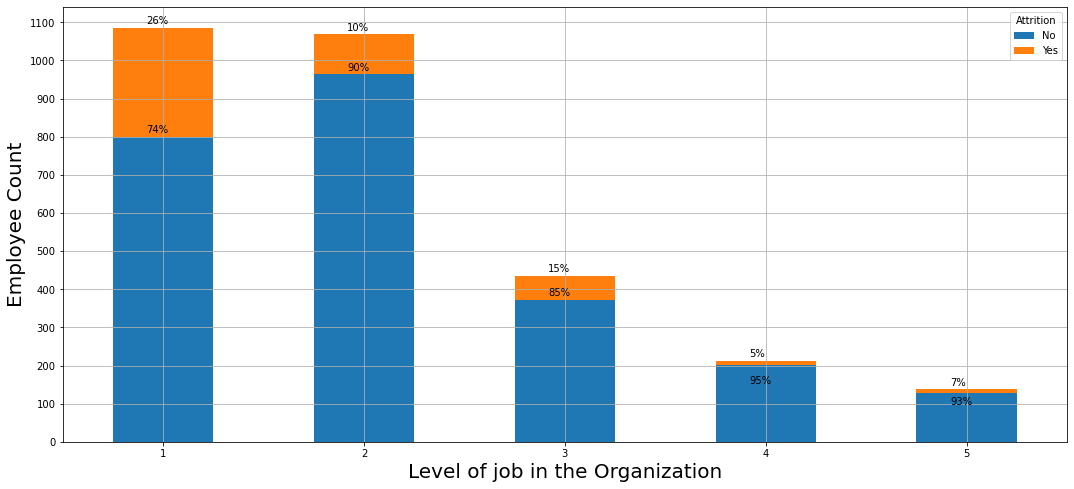

In [502]:
"""Attrition is more both in count and percentagewise in JobLevel 1"""

df_JobLevel = pd.DataFrame(df.groupby(by=['JobLevel','Attrition']).size(), columns=['count'])
for i ,j in df_JobLevel.iterrows():
    df_JobLevel.loc[i,'percentage'] = round(j[0]*100/len(df[df.JobLevel==i[0]]),2)
df_JobLevel.reset_index(inplace=True)   
df_JobLevel.sort_values("Attrition", inplace=True)
df_JobLevel.reset_index(inplace=True,drop=True)
ax=df.groupby(by=['JobLevel','Attrition']).size().unstack(level=1).plot(kind='bar',grid='True',stacked=True,figsize=(18,8))
plt.xticks(rotation=0); plt.ylabel('Employee Count',fontdict={'fontsize':20})
plt.yticks(np.arange(0,1101,100))
plt.xlabel('Level of job in the Organization',fontdict={'fontsize':20})
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy();    ht=-height*.25 if i==3 or i==4  else 10
    ax.annotate('{:.0f}%'.format(df_JobLevel.iloc[i,3]), (x+width/3, y+height+ht));    i+=1

In [472]:
df[(df.JobLevel==1) & (df.Attrition=='Yes')].shape[0]

286

In [473]:
"""60% of overall attritions aree happening in JobLevel 1"""
286/474

0.6033755274261603

#### JobLevel vs Department vs Attrition

In [6]:
df_HR_JobLevel=df[df.Department=='Human Resources'].groupby(['JobLevel','Attrition']).size().unstack().replace(np.nan,0)
df_RD_JobLevel =df[df.Department=='Research & Development'].groupby(['JobLevel','Attrition']).size().unstack().replace(np.nan,0)
df_Sales_JobLevel=df[df.Department=='Sales'].groupby(['JobLevel','Attrition']).size().unstack().replace(np.nan,0)
df_JobLevel_Dep_all=[df_HR_JobLevel, df_RD_JobLevel, df_Sales_JobLevel]
df_JobLevel_Dep_all

[Attrition    No   Yes
 JobLevel             
 1          46.0  20.0
 2          26.0   0.0
 3           8.0   4.0
 4           8.0   0.0
 5          14.0   0.0,
 Attrition   No  Yes
 JobLevel           
 1          666  202
 2          532   30
 3          232   26
 4          134    2
 5           92    6,
 Attrition   No  Yes
 JobLevel           
 1           88   64
 2          406   74
 3          132   34
 4           60    8
 5           22    4]

Text(0.5, 1.0, 'Attrition vs Job Level for each Department')

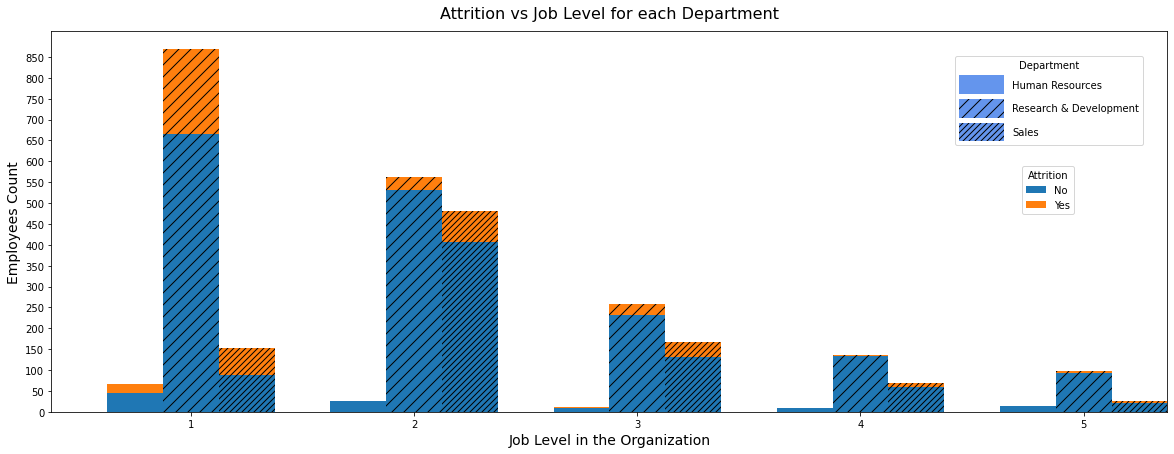

In [58]:
axe=plt.subplot() # Add a subplot to the current figure

for df in df_JobLevel_Dep_all: # a list of DataFrames
       df.plot(kind="bar", figsize=(20,7), 
               stacked=True,   ax=axe)
        
n_df = len(df_JobLevel_Dep_all) # 3 DataFrames
n_col = len(df_JobLevel_Dep_all[0].columns)  # 2 columns
n_ind = len(df_JobLevel_Dep_all[0].index) # 5 rows
H="/" # hatching pattern

h,l = axe.get_legend_handles_labels() # Return handles and labels for legend
# len(h) = n_col * n_df

for i in range(0, n_df * n_col, n_col): # i=0,2,4
    
    # enumerate is useful for obtaining an indexed list (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
    for j, pa in enumerate(h[i:i+n_col]): # for each DataFrame, we are taking the two handles (for two columns)
        
        # pa is a <BarContainer object of 5 artists>
        for rect in pa.patches: # rect -> Rectangle(xy=(-0.25, 0), width=0.5, height=46, angle=0)
            rect.set_width(0.25) # reduced the width from default 0.5 to 0.25
            
            # Rectangles for each Departments were overlapping at each Job Level, so changing the left x-coordinates for 2nd & 3rd dfs
            rect.set_x(rect.get_x() + 0.25*(i/n_col)) 
            
            rect.set_hatch(H * i) # "/"*0-> '', "/"*1-> '/', "/"*2-> '//'

axe.set_xticks(np.arange(0.125,5,1)) # moving xticks from 0,1,2,3,4 to 0.125,1.125,2.125,3.125,4.125
axe.set_xticklabels([1,2,3,4,5], rotation = 0); 
axe.set_yticks(np.arange(0,900,50))

labels=['Human Resources','Research & Development','Sales']
n=[]        
for i in range(n_df):
    n.append(axe.bar(0, 0, color="cornflowerblue", hatch=H*i*2))
# n is [<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]

l1=axe.legend(h[:n_col], l[:n_col], loc=[.87, 0.52], title='Attrition') # passing handles, labels
plt.legend(n, labels, loc=[.81, 0.7], title='Department', handlelength=4.5, handleheight=2.5) 
axe.add_artist(l1) # all visible elements in a figure are subclasses of Artist

plt.xlabel("Job Level in the Organization", fontdict={'fontsize':14})
plt.ylabel("Employees Count", fontdict={'fontsize':14})
plt.title("Attrition vs Job Level for each Department", fontdict={'fontsize':16},           pad=13)

plt.show() # Display all figures.

In [ ]:
"""Attrition more in Research & Development JobLevel 1."""

### Analysing the JobRole column

In [149]:
# How many unique JobRoles?
len(df.JobRole.unique())

9

In [150]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

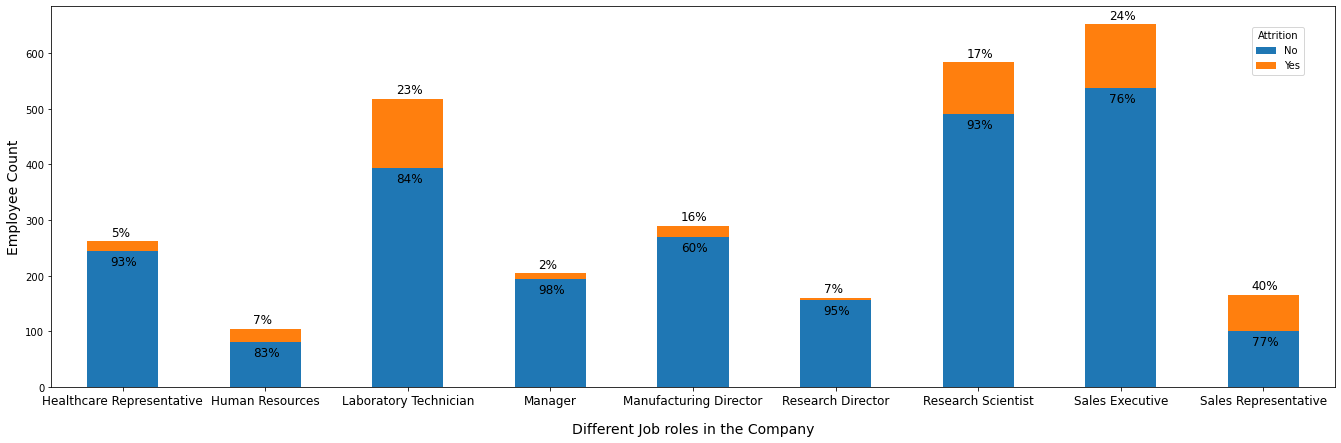

In [204]:
ax=df.groupby(by=['JobRole','Attrition']).size().unstack(level=1).plot(kind='bar',stacked=True,figsize=(23,7)) 
plt.xticks(rotation=0, fontsize=12); 
plt.ylabel('Employee Count',  fontsize=14)
plt.xlabel('Different Job roles in the Company', labelpad=15, fontsize=14)
plt.legend(bbox_to_anchor=(.98, 0.96),title='Attrition') 

# marking the percentage values
df_JobRole = pd.DataFrame(df.groupby(by=['JobRole','Attrition']).size(), columns=['count'])
for i ,j in df_JobRole.iterrows():
    df_JobRole.loc[i,'percentage'] = round(j[0]*100/len(df[df.JobRole==i[0]]),2)
df_JobRole.reset_index(inplace=True)   
df_JobRole.sort_values("Attrition", inplace=True)
df_JobRole.reset_index(inplace=True,drop=True)
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_JobRole.iloc[i,3]), (x+width/3, y+height+10 if i>8 else y+height-25 ),fontsize=12) 
    i+=1  

In [ ]:
"""Corresponds to an earlier observation that, 
Attrition is higher among Laboratory Technician and Research Scientist JobRoles in R&D Department
and Sales Executives and Sales Representatives JobRoles in Sales Department."""

### Analysing the MaritalStatus column

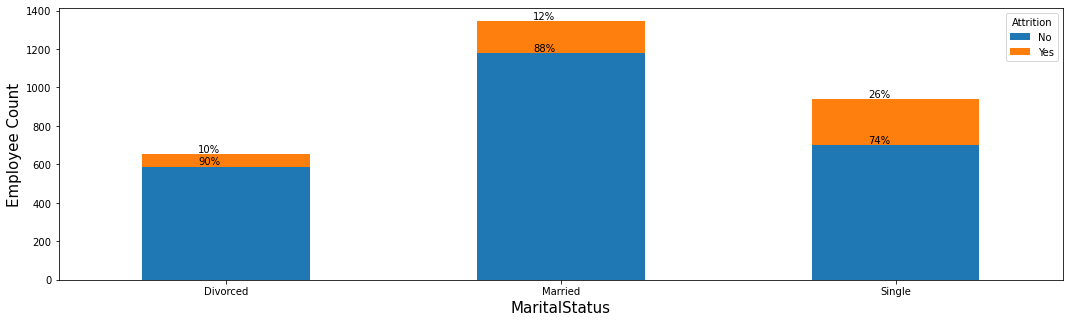

In [480]:
df_MaritalStatus = pd.DataFrame(df.groupby(by=['MaritalStatus','Attrition']).size(), columns=['count'])
for i ,j in df_MaritalStatus.iterrows():
    df_MaritalStatus.loc[i,'percentage'] = round(j[0]*100/len(df[df.MaritalStatus==i[0]]),2)
df_MaritalStatus.reset_index(inplace=True)   
df_MaritalStatus.sort_values("Attrition", inplace=True)
df_MaritalStatus.reset_index(inplace=True,drop=True)
ax=df.groupby(by=['MaritalStatus','Attrition']).size().unstack(level=1).plot(kind='bar',stacked=True,figsize=(18,5))
plt.xticks(rotation=0); plt.ylabel('Employee Count')
i=0
for p in ax.patches:
    width = p.get_width();    height = p.get_height();    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(df_MaritalStatus.iloc[i,3]), (x+width/3, y+height+10))
    i+=1

### Analysing the MonthlyIncome column

In [396]:
# MonthlyIncome ranges from 1009 to 19999
len(df.MonthlyIncome.unique()), df.MonthlyIncome.min(), df.MonthlyIncome.max()

(1349, 1009, 19999)

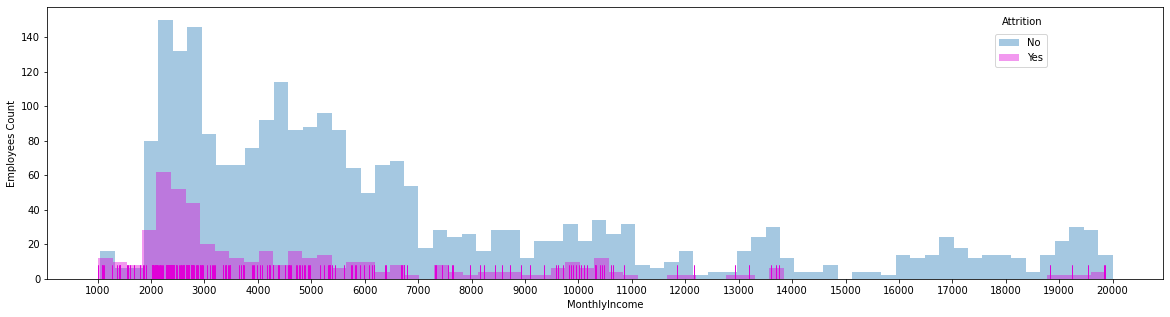

In [393]:
fig,ax=plt.subplots(figsize=(20,5))
sns.distplot(df[df.Attrition=='No'].MonthlyIncome,kde=False, bins=70,label='No')
sns.distplot(df[df.Attrition=='Yes'].MonthlyIncome,kde=False,bins=69,rug=True,label='Yes', color='#DF01D7')
ax.annotate('Attrition',(17922,147)) # text, xy cordinates
plt.xticks(np.arange(1000,20001,1000)); plt.ylabel('Employees Count');
plt.legend(bbox_to_anchor=(.9, 0.92))   

"""Attrition is more in 2000 to 3000 Monthly Income Range"""

In [470]:
# count of attrite employees in 2000 to 300 MonthlyIncomeRange
df[(df.MonthlyIncome >=2000) &(df.MonthlyIncome <=3000) & (df.Attrition=='Yes')].shape[0]

190

In [471]:
"""40% of attrition happening in 2000-3000 MonthlyIncomeRange"""

190/474

0.4008438818565401

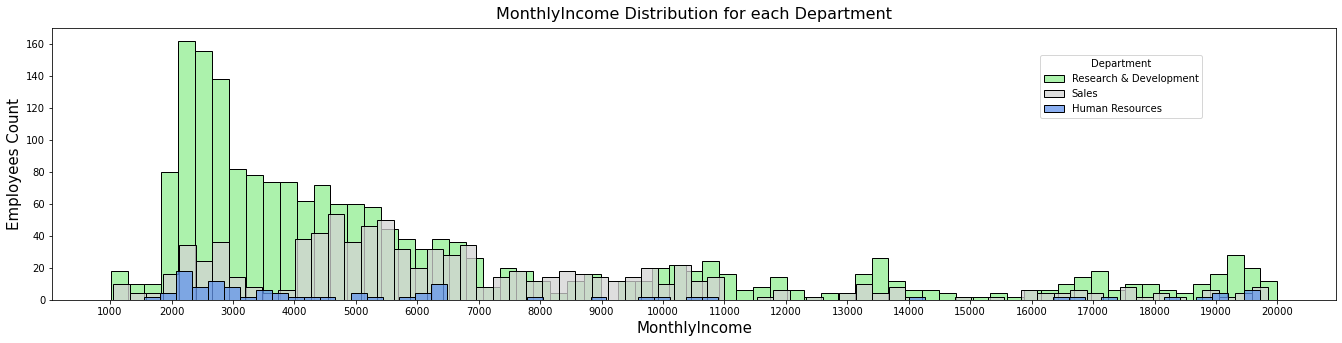

In [492]:
# dept vs income
fig,ax=plt.subplots(figsize=(23,5))
sns.histplot(df[df.Department=='Research & Development'].MonthlyIncome,kde=False,bins=69,label='Research & Development',color='lightgreen')
sns.histplot(df[df.Department=='Sales'].MonthlyIncome,kde=False, bins=70,label='Sales', color='lightgray')
sns.histplot(df[df.Department=='Human Resources'].MonthlyIncome,kde=False, bins=70,label='Human Resources', color='cornflowerblue')
plt.xticks(np.arange(1000,20001,1000)); plt.ylabel('Employees Count'); 
plt.title("MonthlyIncome Distribution for each Department", fontdict={'fontsize':16}, pad=9) #pad:The offset of the title from the top of the axes in points.
plt.legend(bbox_to_anchor=(.9, 0.92), title ="Department" ) 

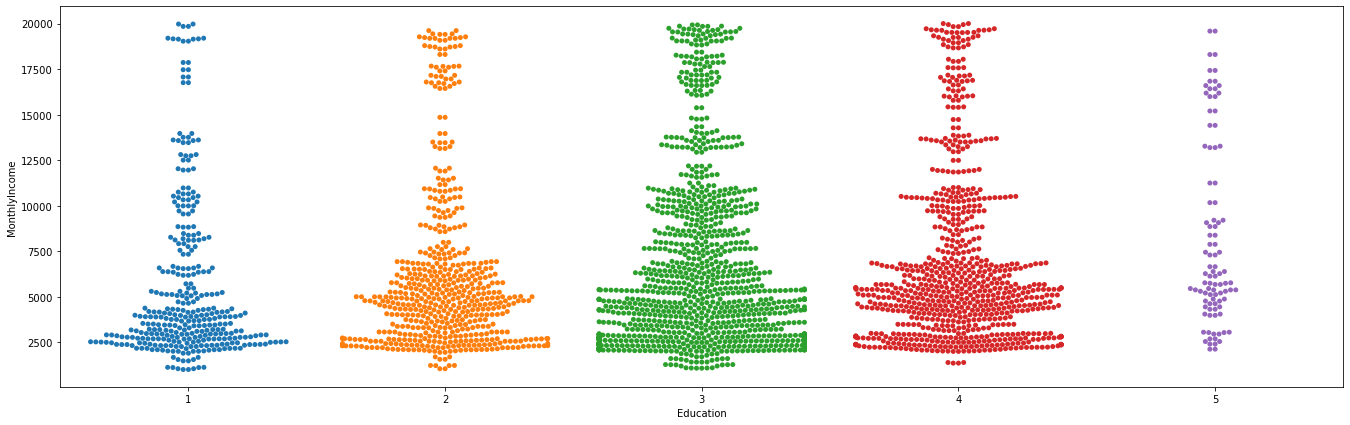

In [5]:
# MonthlyIncome for different Education ratings
plt.subplots(figsize=(23,7))
sns.swarmplot(df.Education,df.MonthlyIncome)

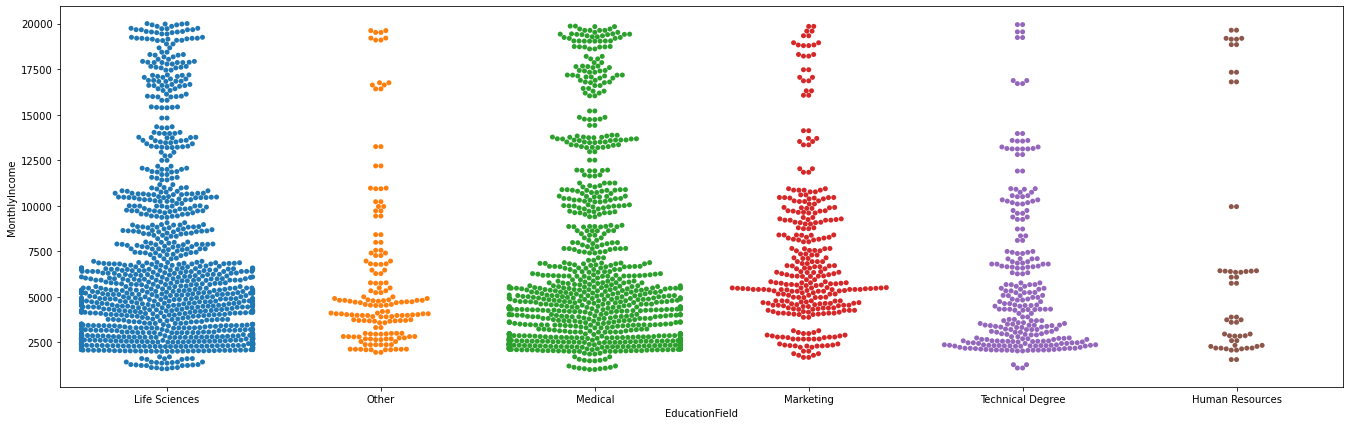

In [423]:
#  MonthlyIncome for different Education fields
plt.subplots(figsize=(23,7))
sns.swarmplot(df.EducationField,df.MonthlyIncome)

'Whether BusinessTravel is included or not, as Joblevel increases, mean MonthlyIncome increases'

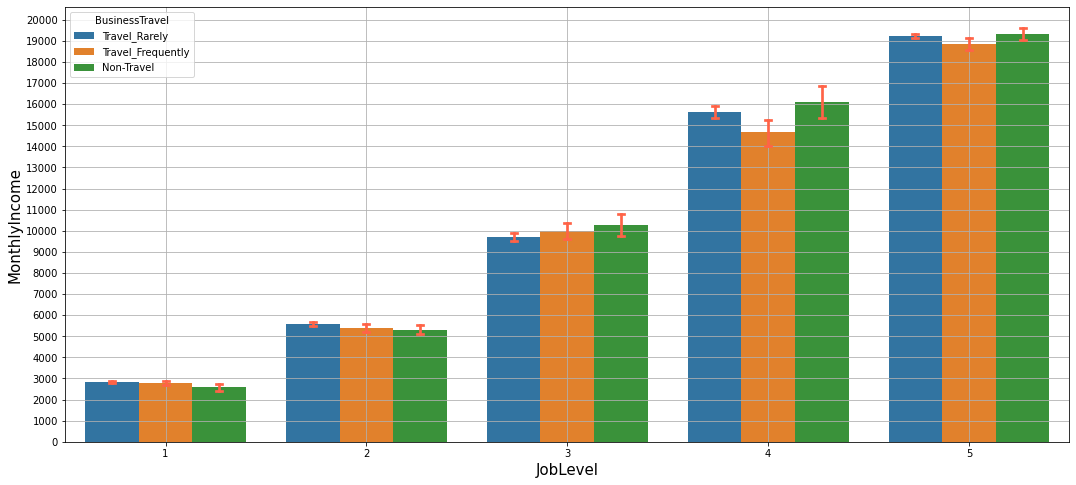

In [320]:
plt.subplots(figsize=(18,8))
sns.barplot(x='JobLevel',y="MonthlyIncome",data=df,hue='BusinessTravel',capsize=.03, errcolor='tomato')
plt.yticks(np.arange(0,20001,1000))
plt.grid()

"""Whether BusinessTravel is included or not, as Joblevel increases, mean MonthlyIncome increases"""

#### Looking at the error bar in JobLevel4, Non-Travel category

In [321]:
print(round(df[(df.JobLevel==4) & (df.BusinessTravel=="Non-Travel")].MonthlyIncome.mean()))  # mean
print(round(df[(df.JobLevel==4) & (df.BusinessTravel=="Non-Travel")].MonthlyIncome.std(ddof=1)))  # sample std

16092
1850


In [322]:
16092-1850, 16092+1850  # error bars here shows the margin of error(ci=0.95) around mean, not std

(14242, 17942)

In [323]:
# MonthlyIncome values for JobLevel4, Non-Travel category
print(sorted(df[(df.JobLevel==4) & (df.BusinessTravel=="Non-Travel")].MonthlyIncome))
df[(df.JobLevel==4) & (df.BusinessTravel=="Non-Travel")].MonthlyIncome.describe()

[12965, 12965, 13194, 13194, 13577, 13577, 16291, 16291, 16756, 16756, 16792, 16792, 16885, 16885, 17328, 17328, 17444, 17444, 17861, 17861, 17924, 17924]


count       22.000000
mean     16092.454545
std       1850.155379
min      12965.000000
25%      14255.500000
50%      16792.000000
75%      17415.000000
max      17924.000000
Name: MonthlyIncome, dtype: float64

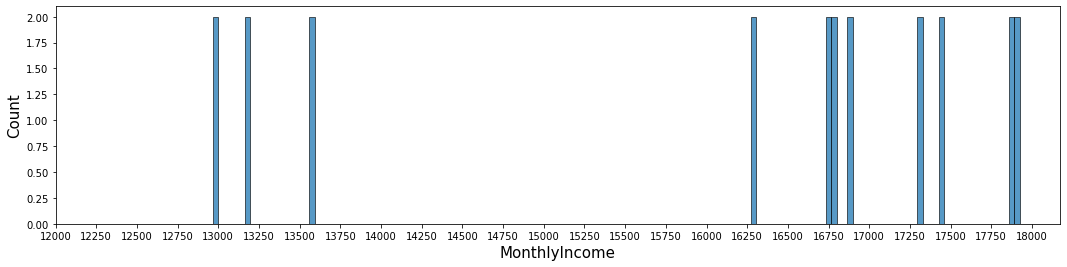

In [338]:
# MonthlyIncome distribution for JobLevel4, Non-Travel category
plt.subplots(figsize=(18,4))
sns.histplot(df[(df.JobLevel==4) & (df.BusinessTravel=="Non-Travel")].MonthlyIncome, bins=150)
plt.xticks(np.arange(12000,18001,250))
plt.show()

'Not much difference in the mean salary for Female and Male employees.'

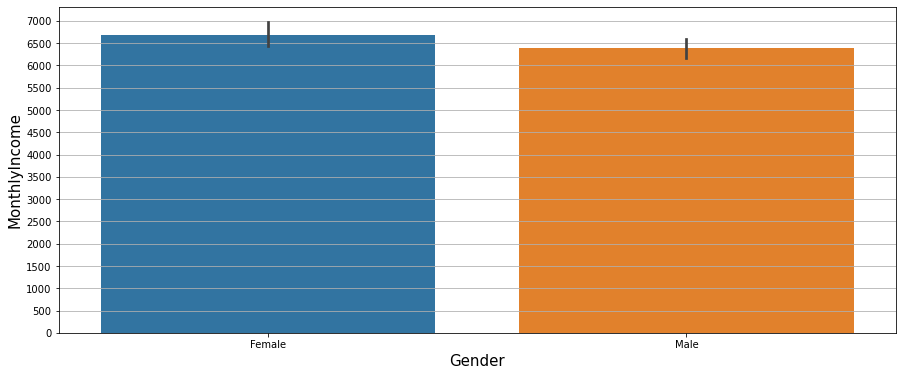

In [493]:
plt.subplots(figsize=(15,6))
plt.grid()
plt.yticks(np.arange(0,7001,500))
sns.barplot(x='Gender',y="MonthlyIncome",data=df)

"""Not much difference in the mean salary for Female and Male employees."""

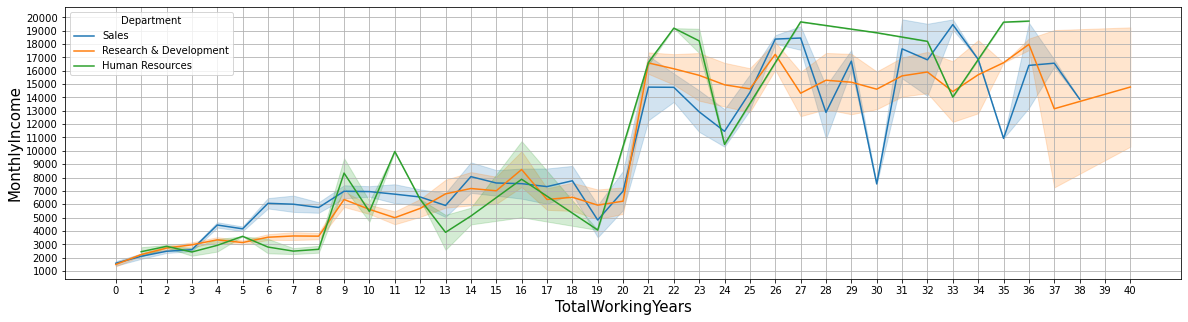

'MonthlyIncome increases as TotalWorkingYears increases, \nhowever there is a sharp increase in mean MonthlyIncome for TotalWorkingYears from 20 to 21, in all the Departments.'

In [71]:
plt.subplots(figsize=(20,5))
plt.grid()
sns.lineplot(data=df, x="TotalWorkingYears", y="MonthlyIncome", 
             hue='Department'   )
plt.xticks(np.arange(df["TotalWorkingYears"].min(),df["TotalWorkingYears"].max()+1,1))
plt.yticks(np.arange(1000,21000, 1000))
plt.show()
"""MonthlyIncome increases as TotalWorkingYears increases, 
however there is a sharp increase in mean MonthlyIncome for TotalWorkingYears from 20 to 21, in all the Departments."""

In [346]:
# sharp increase in mean MonthlyIncome from 20 to 21 TotalWorkingYears
print(f"mean MonthlyIncome for TotalWorkingYears=20 Employees: {round(df[df.TotalWorkingYears==20].MonthlyIncome.mean())}")
print(f"mean MonthlyIncome for TotalWorkingYears=21 Employees: {round(df[df.TotalWorkingYears==21].MonthlyIncome.mean())}")

mean MonthlyIncome for TotalWorkingYears=20 Employees: 6431
mean MonthlyIncome for TotalWorkingYears=21 Employees: 16265


In [347]:
len(df[df.TotalWorkingYears==20]), len(df[df.TotalWorkingYears==21])

# 60 employees with TotalWorkingYears=20 and 68 employees with TotalWorkingYears==21

(60, 68)

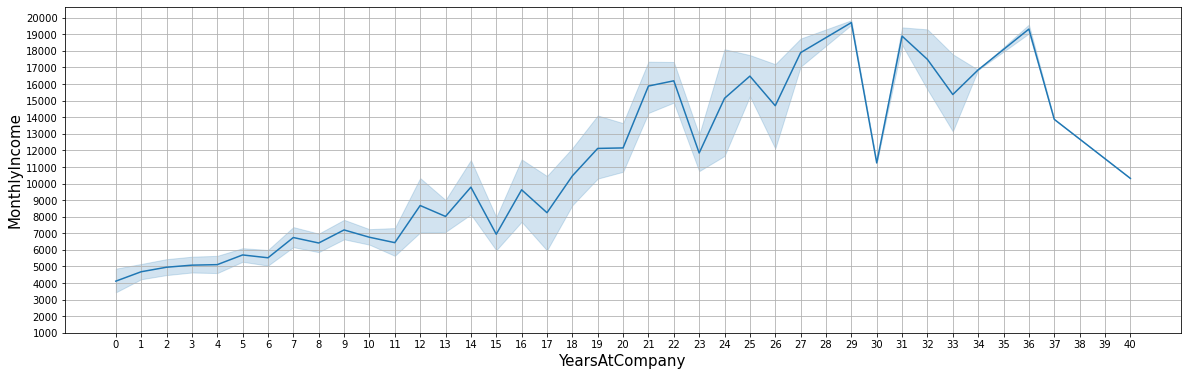

In [73]:
# MonthlyIncome with respect to YearsAtCompany
plt.subplots(figsize=(20,6))
plt.grid()
sns.lineplot(data=df, x="YearsAtCompany", y="MonthlyIncome"            )
plt.xticks(np.arange(df["YearsAtCompany"].min(),df["YearsAtCompany"].max()+1,1))
plt.yticks(np.arange(1000,21000, 1000))
plt.show()
# mean MonthlyIncome along with its CI is plotted against each YearsAtCompany value

In [350]:
# Why there is a sharp decline at YearsAtCompany==30?
print(df[df.YearsAtCompany==29].MonthlyIncome)
print(df[df.YearsAtCompany==30].MonthlyIncome)
print(df[df.YearsAtCompany==31].MonthlyIncome)

411     19566
918     19847
1881    19566
2388    19847
Name: MonthlyIncome, dtype: int64
1138    11245
2608    11245
Name: MonthlyIncome, dtype: int64
473     19502
595     19246
653     17924
1943    19502
2065    19246
2123    17924
Name: MonthlyIncome, dtype: int64


In [353]:
# Taking YearsAtCompany==30 employees

"""Other than EmployeeNumber, all other values are same for these two records. These may be duplicates."""

df[df.YearsAtCompany==30]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1138,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1139,...,3,80,1,32,3,3,30,8,12,13
2608,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,2609,...,3,80,1,32,3,3,30,8,12,13


In [45]:
# first record from above dataset slice
df[df.YearsAtCompany==30].iloc[0].values

array([50, 'No', 'Travel_Frequently', 1234, 'Research & Development', 20,
       5, 'Medical', 1, 1139, 2, 'Male', 41, 3, 4,
       'Healthcare Representative', 3, 'Married', 11245, 20689, 2, 'Y',
       'Yes', 15, 3, 3, 80, 1, 32, 3, 3, 30, 8, 12, 13], dtype=object)

In [46]:
# second record from above dataset slice
df[df.YearsAtCompany==30].iloc[1].values

array([50, 'No', 'Travel_Frequently', 1234, 'Research & Development', 20,
       5, 'Medical', 1, 2609, 2, 'Male', 41, 3, 4,
       'Healthcare Representative', 3, 'Married', 11245, 20689, 2, 'Y',
       'Yes', 15, 3, 3, 80, 1, 32, 3, 3, 30, 8, 12, 13], dtype=object)

In [355]:
# only the EmployeeNumber is unique in above two observations.
# Checking whether more duplicates are present

df_new=df.loc[:, df.columns != 'EmployeeNumber']

In [356]:
duplicatedrows = df_new[df_new.duplicated(keep=False)]
duplicatedrows.shape # returning whole 2940 rows

(2940, 34)

In [34]:
df.iloc[[1, 1471]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
1471,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,1472,...,4,80,1,10,3,3,10,7,1,7


In [357]:
df.iloc[[2, 1472]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
1472,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,1473,...,2,80,0,7,3,3,0,0,0,0


In [75]:
# taking the first half of dataset and comparing it with second half of the dataset
df_new.iloc[:1470].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [76]:
df_new.iloc[1470:].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
"""The whole dataset is duplicated, every row and its (index+1470) row are identical."""

### Analysing the MonthlyIncome and MonthlyRate columns

In [372]:
df.MonthlyIncome.describe()

count     2940.000000
mean      6502.931293
std       4707.155770
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8380.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [373]:
df.MonthlyRate.describe()

count     2940.000000
mean     14313.103401
std       7116.575021
min       2094.000000
25%       8045.000000
50%      14235.500000
75%      20462.000000
max      26999.000000
Name: MonthlyRate, dtype: float64

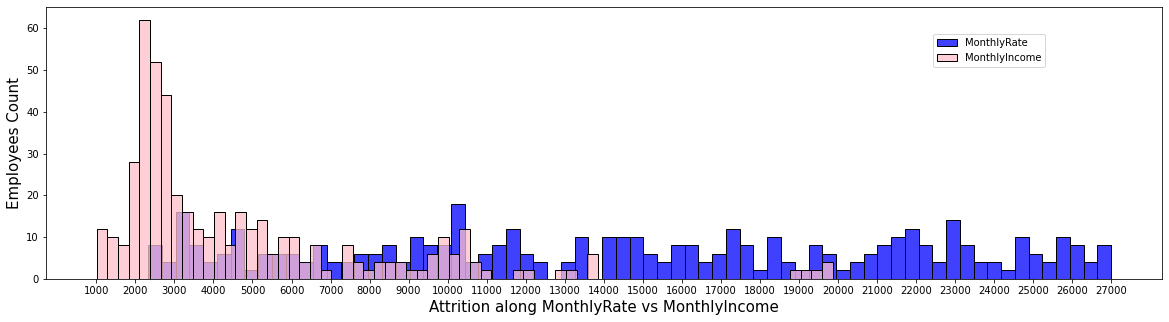

In [375]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(df[df.Attrition=='Yes'].MonthlyRate,kde=False, bins=70,label='MonthlyRate',color="blue")
sns.histplot(df[df.Attrition=='Yes'].MonthlyIncome,kde=False,bins=69,label='MonthlyIncome', color='pink')
plt.xticks(np.arange(1000,27001,1000)); plt.ylabel('Employees Count');
plt.legend(bbox_to_anchor=(.9, 0.92))  
plt.xlabel("Attrition along MonthlyRate vs MonthlyIncome")

"""Attrition is kind of uniformly spread across different MonthlyRates, but Attrition is higher for Lower Income levels."""
plt.show()

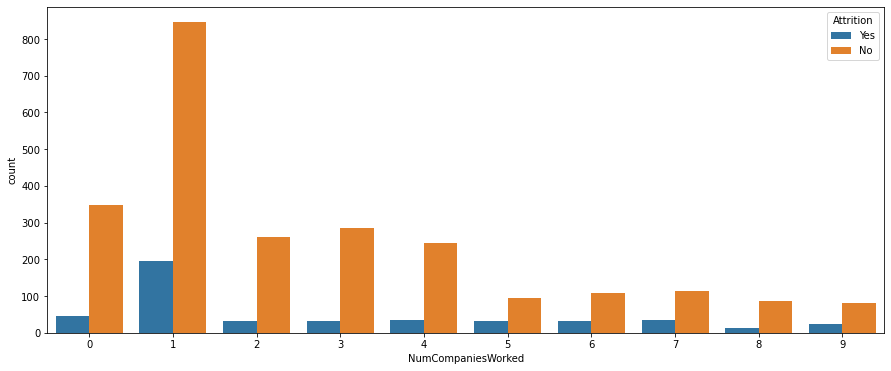

In [366]:
"""Attrition is more for Employees who have worked in just 1 company earlier."""

plt.subplots(figsize=(15,6))
sns.countplot(x='NumCompaniesWorked', data=df, hue='Attrition')

### Analysing OverTime column

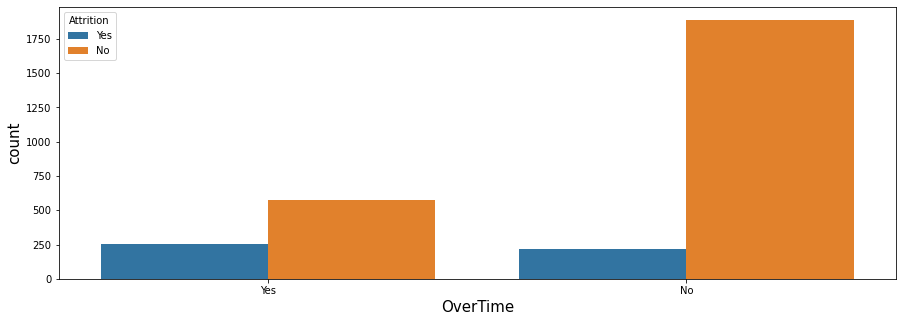

In [376]:
plt.subplots(figsize=(15,5))
sns.countplot(x='OverTime', data=df, hue='Attrition')

In [377]:
# Analysing attrition for Employees with OverTime

df[df.OverTime=='Yes'].groupby('Attrition').size()

Attrition
No     578
Yes    254
dtype: int64

In [378]:
"""Almost 30% Attrition for Employees with OverTime"""

254/(254+578)

0.30528846153846156

In [103]:
df[df.Attrition=='Yes'].groupby('OverTime').size()

OverTime
No     220
Yes    254
dtype: int64

In [104]:
"""53% of attrite employees had OverTime"""

254/(220+254)

0.5358649789029536

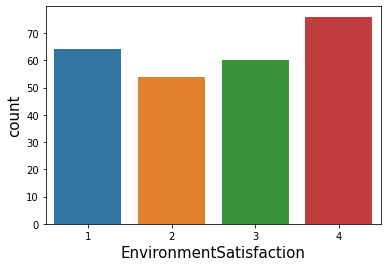

In [127]:
# Out of the 254 attrited employees who also had OverTime, was EnvironmentSatisfaction a concern?

sns.countplot(x=df[(df.OverTime=='Yes') & (df.Attrition=='Yes')].EnvironmentSatisfaction)

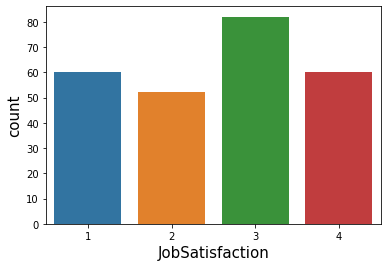

In [128]:
# Out of the 254 attrited employees who also had OverTime, was JobSatisfaction a concern?

sns.countplot(x=df[(df.OverTime=='Yes') & (df.Attrition=='Yes')].JobSatisfaction)

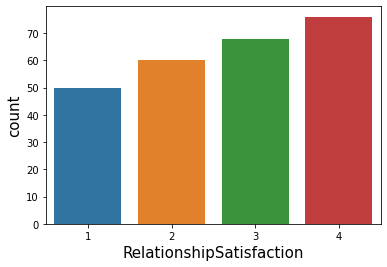

In [129]:
# Out of the 254 attrited employees who also had OverTime, was RelationshipSatisfaction a concern?

sns.countplot(x=df[(df.OverTime=='Yes') & (df.Attrition=='Yes')].RelationshipSatisfaction)

### Analyisng the PercentSalaryHike

In [387]:
sorted(df.PercentSalaryHike.unique())

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

'Attrition is slightly more in Employees with PercentSalaryHike <= 13% '

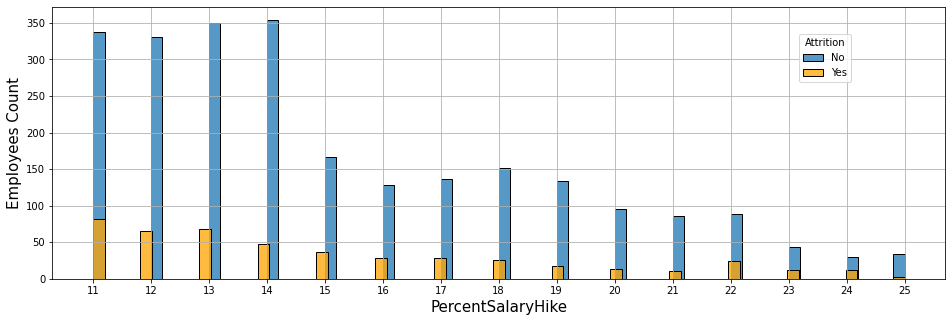

In [494]:
fig,ax=plt.subplots(figsize=(16,5))
sns.histplot(df[df.Attrition=='No'].PercentSalaryHike,kde=False, bins=70,label='No')
sns.histplot(df[df.Attrition=='Yes'].PercentSalaryHike,kde=False,bins=69, label='Yes', color='orange')
plt.ylabel('Employees Count'); plt.xticks(np.arange(11,26))
plt.legend(bbox_to_anchor=(.9, 0.92), title="Attrition") ; plt.grid()

"""Attrition is slightly more in Employees with PercentSalaryHike <= 13% """

In [721]:
"""Even after getting the highest PercentSalaryHike (25%), two employees left."""

df[(df.Attrition=="Yes") & (df.PercentSalaryHike==25)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
892,19,Yes,Non-Travel,504,Research & Development,10,3,Medical,1,893,...,2,80,0,1,2,4,1,1,0,0
2362,19,Yes,Non-Travel,504,Research & Development,10,3,Medical,1,2363,...,2,80,0,1,2,4,1,1,0,0


### Analysing PerformanceRating column

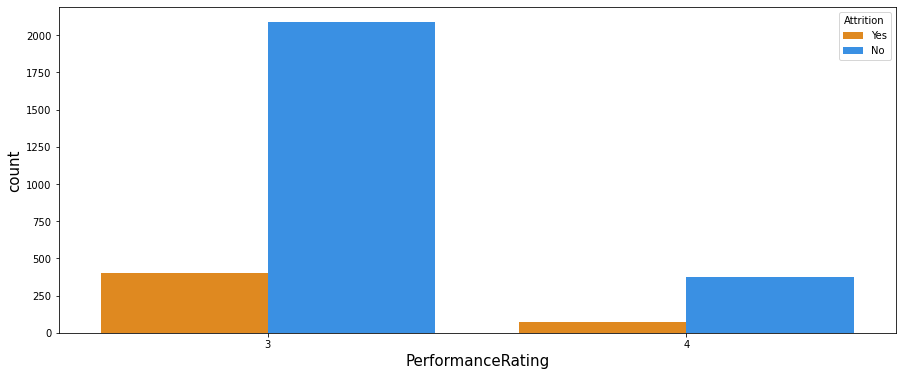

In [457]:
"""Attrition is high for Employees with Performance Rating=3."""

plt.subplots(figsize=(15,6))
sns.countplot(x='PerformanceRating', data=df, hue='Attrition', palette=['darkorange','dodgerblue'])

In [508]:
df[df.PerformanceRating==3].groupby("Attrition").size()

Attrition
No     2088
Yes     400
dtype: int64

In [509]:
df[df.PerformanceRating==4].groupby("Attrition").size()

Attrition
No     378
Yes     74
dtype: int64

In [510]:
"""Almost same percentage of Attrition for both PerformanceRatings."""
# This column can be dropped for building prediction model as % is same in both cases 

400/(400+2088), 74/(74+378)

(0.1607717041800643, 0.16371681415929204)

In [396]:
df.StandardHours.unique() #constant value, can drop this column

array([80], dtype=int64)

### Analysing StockOptionLevel column 

In [436]:
df.StockOptionLevel.unique()

array([0, 1, 3, 2], dtype=int64)

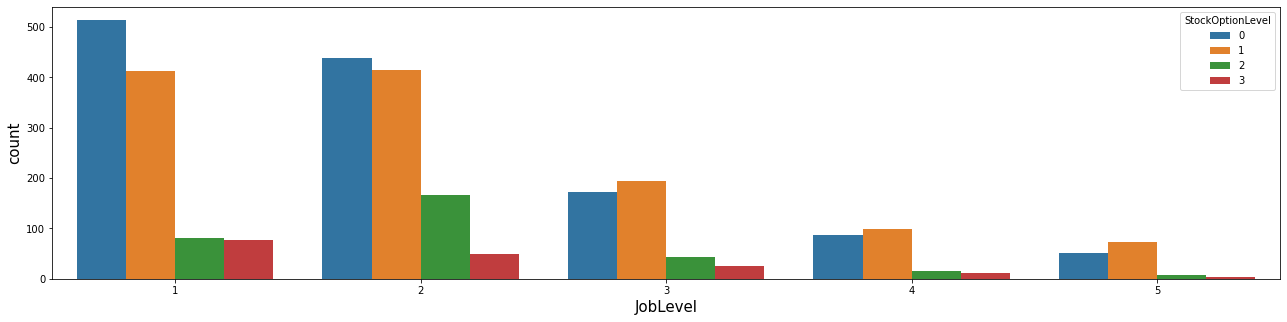

In [419]:
# Do all JobLevels have StockOptions? Yes

plt.subplots(figsize=(22,5))
sns.countplot(x='JobLevel', data=df,hue='StockOptionLevel')
plt.show()

In [434]:
df[df.StockOptionLevel==0].groupby("Attrition").size()

Attrition
No     954
Yes    308
dtype: int64

In [22]:
308/(308+954)  # Attrition percentage is ~24% for StockOptionLevel=0 Employees

0.24405705229793978

In [435]:
df[df.StockOptionLevel==1].groupby("Attrition").size()

Attrition
No     1080
Yes     112
dtype: int64

In [23]:
112/(112+1080)  # Attrition percentage is ~9.4% for StockOptionLevel=1 Employees

0.09395973154362416

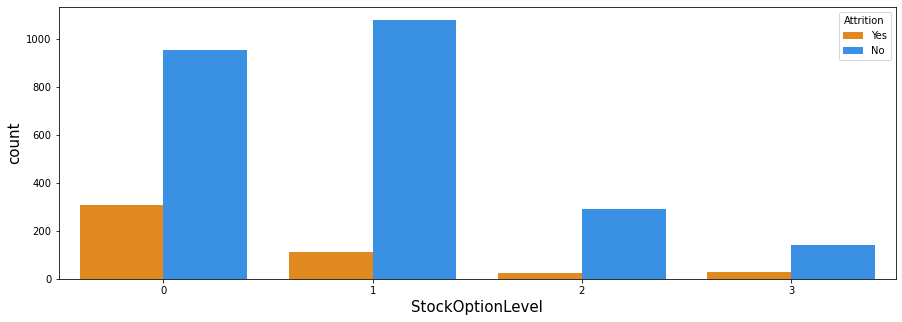

In [21]:
"""Employee count with StockOptionLevel=0 (is 1262) and 
Employee count with StockOptionLevel=1 (is 1192) are not much different.
but there is a much higher difference in their Attrition percentage - 24% and 9.4%"""

plt.subplots(figsize=(15,5))
sns.countplot(x='StockOptionLevel', data=df, hue='Attrition', palette=['darkorange','dodgerblue']) 

### Analysing TotalWorkingYears column

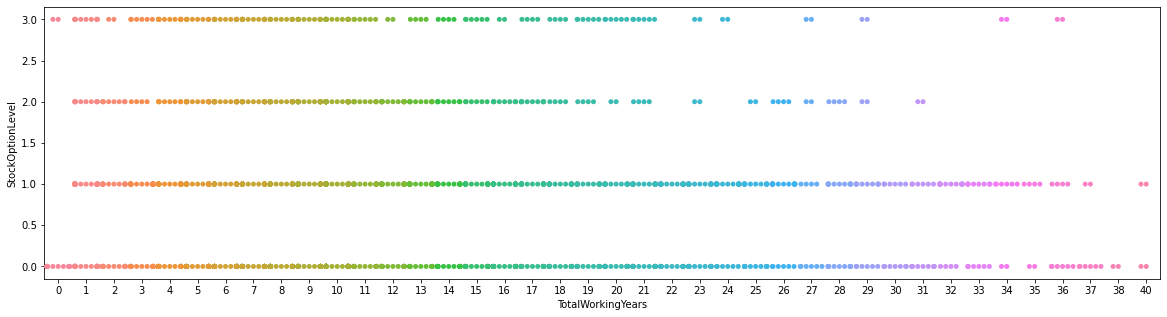

In [441]:
plt.subplots(figsize=(20,5))
sns.swarmplot(x=df.TotalWorkingYears, y=df.StockOptionLevel)

# almost, all TotalWorkingYears categories have StockOptions available

In [442]:
df[df.TotalWorkingYears==40]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,127,...,4,80,1,40,3,2,40,10,15,6
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,596,...,4,80,0,40,2,3,31,15,13,8
1596,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,1597,...,4,80,1,40,3,2,40,10,15,6
2065,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,2066,...,4,80,0,40,2,3,31,15,13,8


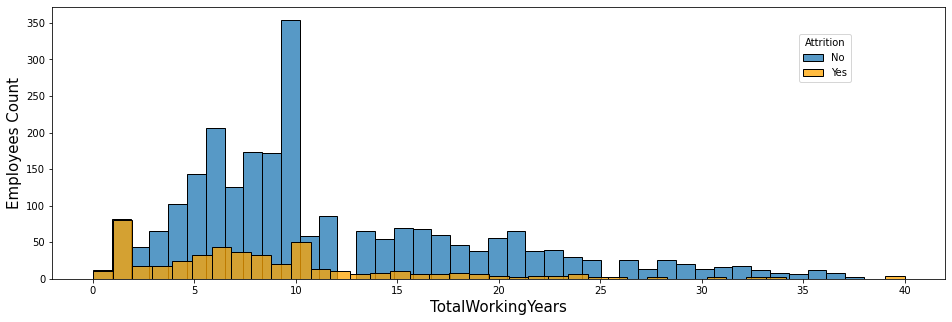

In [425]:
fig,ax=plt.subplots(figsize=(16,5))
sns.histplot(df[df.Attrition=='No'].TotalWorkingYears,kde=False, bins=41,label='No')
sns.histplot(df[df.Attrition=='Yes'].TotalWorkingYears,kde=False,bins=41,label='Yes', color='orange')
plt.ylabel('Employees Count'); 
plt.legend(bbox_to_anchor=(.9, 0.92), title="Attrition") 

"""Employees with 10 years of experience are the most in the company. Attrition count very less for employees with TotalWorkingYears>10"""
plt.show()

In [419]:
"""Almost 50% Attrition for Employees with 1 year of experience"""

df[df.TotalWorkingYears==1].groupby("Attrition").size()

Attrition
No     82
Yes    80
dtype: int64

In [417]:
df[df.TotalWorkingYears==10].groupby("Attrition").size()

Attrition
No     354
Yes     50
dtype: int64

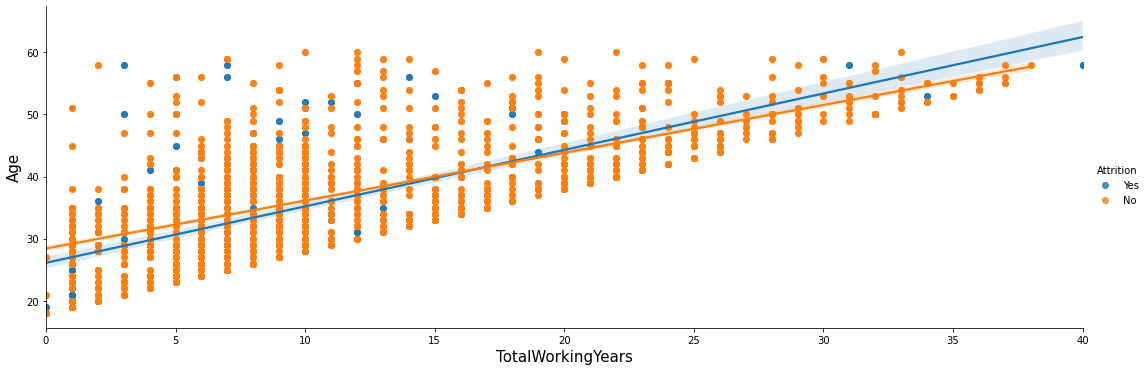

In [26]:
sns.lmplot(x="TotalWorkingYears", y="Age",data=df, height=5, aspect=3, hue="Attrition")

# TotalWorkingYears and Age are directly proportional, can drop one of the column

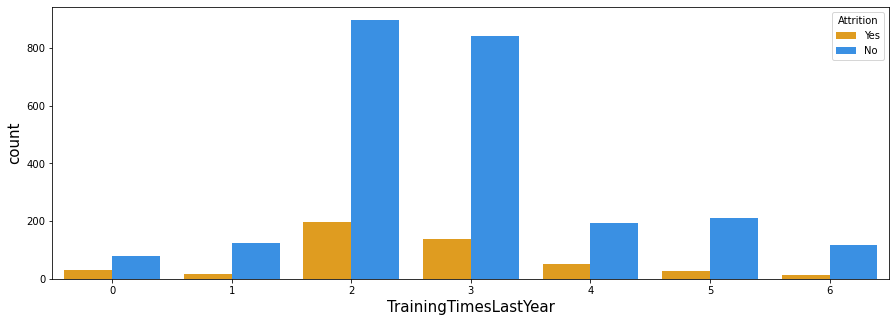

In [28]:
# Most of the employees are attending 2 or 3 trainings/year, Attrition also more in this category

plt.subplots(figsize=(15,5))
sns.countplot(x='TrainingTimesLastYear', data=df, hue='Attrition', palette=['orange','dodgerblue']); 

### Analysing YearsAtCompany column

In [459]:
print(sorted(df.YearsAtCompany.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 40]


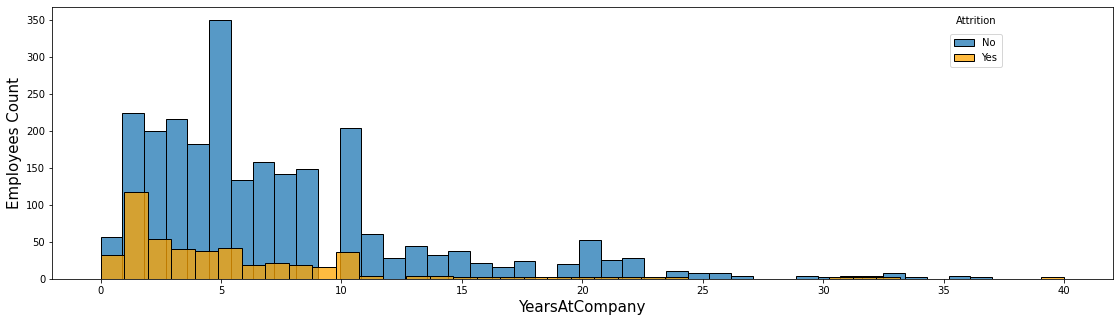

In [429]:
fig,ax=plt.subplots(figsize=(19,5))
sns.histplot(df[df.Attrition=='No'].YearsAtCompany,kde=False, bins=41,label='No')
sns.histplot(df[df.Attrition=='Yes'].YearsAtCompany,kde=False,bins=41,label='Yes', color='orange')
ax.annotate('Attrition',(35.5,345)) # text, xy cordinates
plt.ylabel('Employees Count'); 
plt.legend(bbox_to_anchor=(.9, 0.92)) 

"""Employees with YearsAtCompany <= 10 years are more likely for attrition."""

### Analysing YearsInCurrentRole column

In [466]:
print(sorted(df.YearsInCurrentRole.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


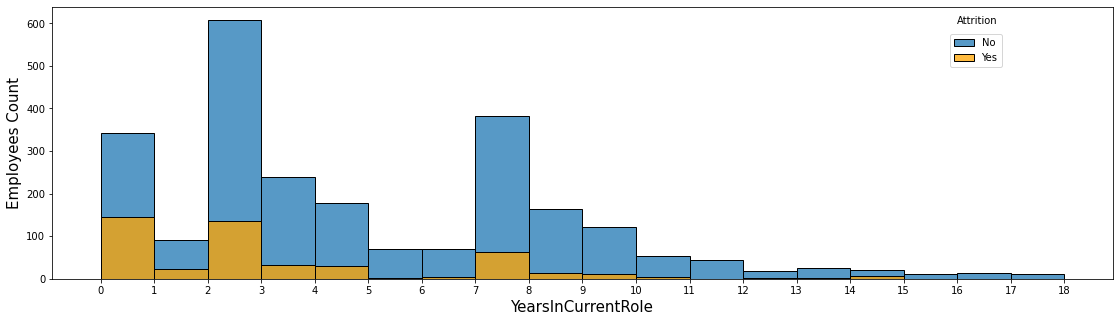

In [432]:
fig,ax=plt.subplots(figsize=(19,5))
sns.histplot(df[df.Attrition=='No'].YearsInCurrentRole,kde=False,bins=18,label='No')
sns.histplot(df[df.Attrition=='Yes'].YearsInCurrentRole,kde=False,bins=15, label='Yes', color='orange')
ax.annotate('Attrition',(16,600)) # text, xy cordinates
plt.ylabel('Employees Count'); 
plt.xticks(np.arange(0,19))
plt.legend(bbox_to_anchor=(.9, 0.92)) 

"""Employees with YearsInCurrentRole <= 10 years are more likely for attrition."""

### Analysing YearsSinceLastPromotion column

In [472]:
print(sorted(df.YearsSinceLastPromotion.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


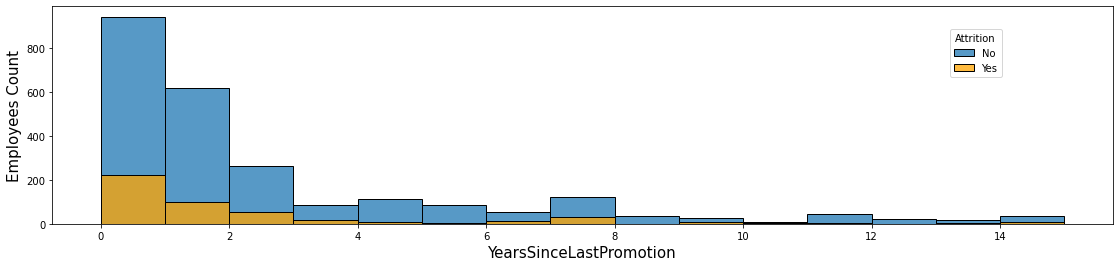

In [434]:
plt.subplots(figsize=(19,4))
sns.histplot(df[df.Attrition=='No'].YearsSinceLastPromotion,kde=False,bins=15,label='No')
sns.histplot(df[df.Attrition=='Yes'].YearsSinceLastPromotion,kde=False, bins=15, label='Yes', color='orange')
plt.ylabel('Employees Count'); 
plt.legend(bbox_to_anchor=(.9, 0.92), title="Attrition") 

"""Employees with YearsSinceLastPromotion <= 8 years are more likely for attrition."""

### Analysing YearsWithCurrManager column

In [485]:
print(sorted(df.YearsWithCurrManager.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


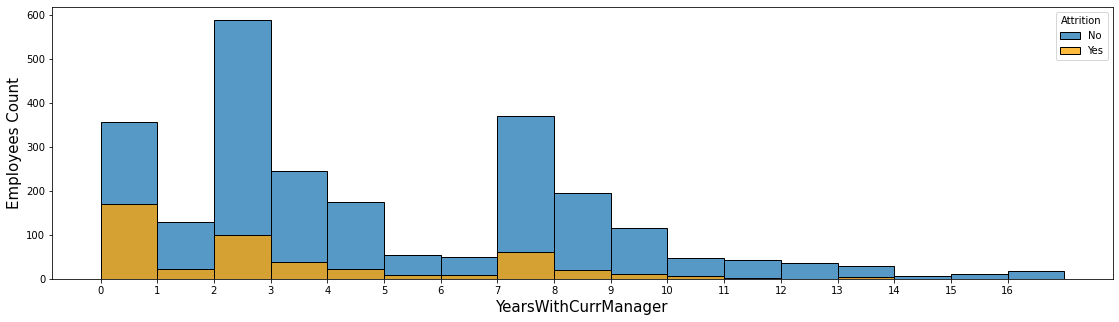

In [435]:
plt.subplots(figsize=(19,5))
sns.histplot(df[df.Attrition=='No'].YearsWithCurrManager,kde=False,bins=17,label='No')
sns.histplot(df[df.Attrition=='Yes'].YearsWithCurrManager,kde=False, bins=14, label='Yes', color='orange')
plt.xticks(np.arange(0,17))
plt.ylabel('Employees Count'); 
plt.legend( title="Attrition") 

Text(0.5, 0, 'Comparing YearsInCurrentRole, YearsWithCurrManager and YearsSinceLastPromotion')

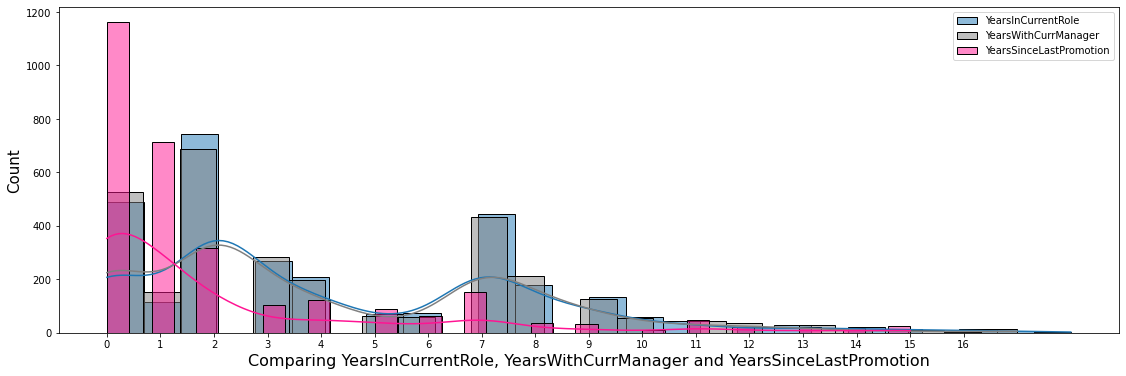

In [444]:
plt.subplots(figsize=(19,6))
sns.histplot(df.YearsInCurrentRole,label='YearsInCurrentRole', kde=True)
sns.histplot(df.YearsWithCurrManager,label='YearsWithCurrManager', color='grey', kde=True)
sns.histplot(df.YearsSinceLastPromotion, label="YearsSinceLastPromotion", kde=True, color="deeppink")
plt.xticks(np.arange(0,17))
plt.legend() 
plt.xlabel('Comparing YearsInCurrentRole, YearsWithCurrManager and YearsSinceLastPromotion', fontdict={"fontsize":16})

# YearsInCurrentRole and YearsWithCurrManager distributions are more or less similar, can drop one column for modelling

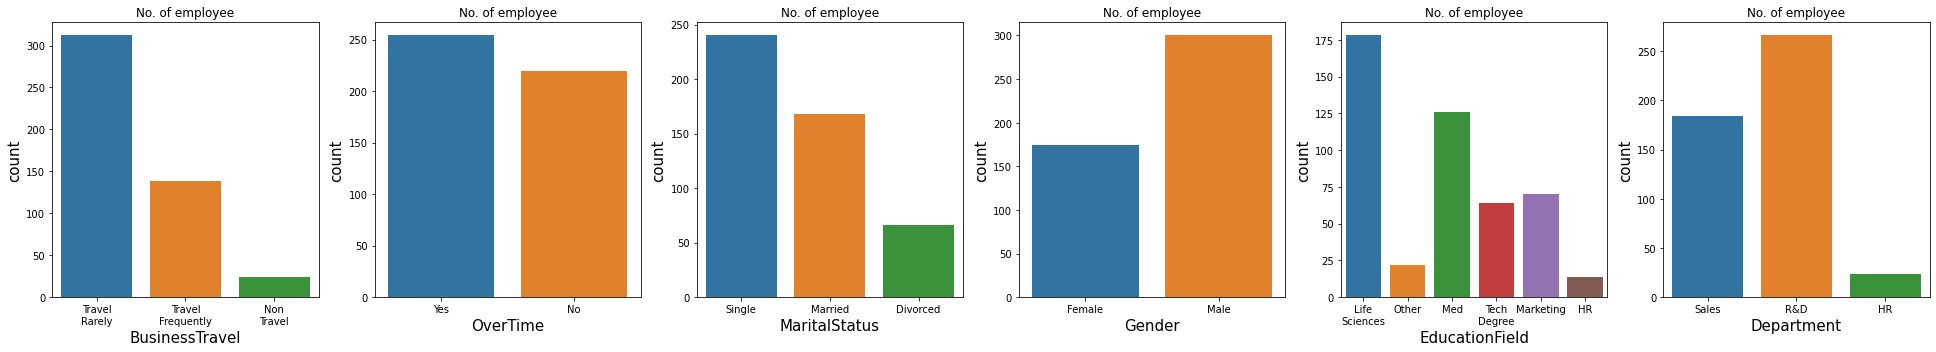

In [450]:
import itertools
categorical=['BusinessTravel','OverTime','MaritalStatus','Gender','EducationField','Department']
fig=plt.subplots(figsize=(27,5))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(1, length,j+1)
    sns.countplot(x=i,data = df[df['Attrition']=='Yes'])
    plt.title("No. of employee")
    if j==0:
        plt.xticks([0,1,2], labels=['Travel\nRarely', 'Travel\nFrequently','Non\nTravel'])
    elif j==4:
        plt.xticks([0,1,2,3,4,5], labels=['Life\nSciences', 'Other','Med', 'Tech\nDegree', 'Marketing', 'HR'])
    elif j==5:
        plt.xticks([0,1,2], labels=['Sales', 'R&D','HR'])
plt.tight_layout()

### Comparing Attrite employees vs current employees 

In [496]:
pd.set_option('display.max_columns', None)
df[df.Attrition=='Yes'].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,474.000000,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1460.464135,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.679102,401.474454,8.443586,1.007178,0.0,841.962823,1.168554,20.078699,0.772587,0.939599,1.116875,3636.360329,7200.529620,2.675686,3.766307,0.363351,1.124247,0.0,0.855456,7.161621,1.253457,0.815589,5.943691,3.171469,3.149742,3.140024
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,736.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1466.500000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,2202.750000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2932.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [475]:
df[df.Attrition=='No'].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1472.429035,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.886557,403.126584,8.011008,1.026793,0.0,850.322568,1.070915,20.376620,0.691909,1.117707,1.093056,4817.230578,7100.819982,2.459591,3.638773,0.360335,1.071386,0.0,0.841814,7.759145,1.293323,0.681768,6.095061,3.648662,3.234106,3.593387
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,736.250000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1471.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,2205.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


# Key Insights from EDA

<div>
    <span style="font-size:16px">
This is an analysis based on 2940 employee records with 35 variables.  <br>
<blockquote>  
    <em><b>1. </b> Overall attrition percentage is 16.12%.  <br>
             <b>   2. </b>   From the above analysis, no key factor leading to attrition could be found. Attrition may be due to a mix of several factors.<br>
<b>3.  </b> Employees who Travel Frequently have a higher attrition percentage ~25%, Sales Representatives who travel frequently have the highest, ~65%. <br> 
<b>4. </b>  ~56% of overall attrition from R&D Department and 95% of that is by Laboratory Technicians and Research Scientists alone. <br>
 <b> 5.</b>  Attrition Percentage is the highest in Sales Department, 21%.  <br>
<b>6. </b>These 4 Job roles - Laboratory Technician, Research Scientist, Sales Executives and Sales Representatives together constitutes 65% of overall strength but they contributes to 84% of the overall attrition. <br> 
<b>7.</b>  60% of overall attritions are happening in JobLevel 1.<br>
<b>8.</b> Younger Employees (0 to 10 years of experience) are more likely for attrition. <br>
<b>9. </b>Attrition is higher in the lower Income levels, infact 40% of overall attrition is happening in 2000-3000 MonthlyIncomeRange. <br> 
<b>10.</b> Employee count with StockOptionLevel=0 (is 1262) and StockOptionLevel=1 (is 1192) are not much different. <br>
But there is a much higher difference in their Attrition percentage - ~24% and ~9%. <br>
        Also StockOptionLevel average for Current Employees is 0.84, but 0.52 for Attrite Employees.  <br>
<b>11.</b> Other key factors like PercentSalaryHike, EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance etc. are not as much contributing to attrition.</em>
   </span> </blockquote>
</div>

### Insights for modelling

1. The whole dataset is duplicated, every row and its (index+1470) row are identical.
2. EmployeeCount - same value for all rows
3. EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction have similiar distribution, so only one of this can be used for modelling.
4. Over18 column can be dropped as all Employees are over 18.
5. PerformanceRating has two values 3 & 4, but same attrition % for both category, so this may not be an important feature.
6. df.StandardHours.unique() has constant value, can drop this column.
7. TotalWorkingYears and Age are directly proportional, can drop one of the column.
8. YearsInCurrentRole and YearsWithCurrManager distributions are more or less similar, can drop one column for modelling.

## Model Creation

In [3]:
# dropping few redundant columns
input_df=df.drop(columns=["EmployeeCount", "EnvironmentSatisfaction", "Over18", "PerformanceRating", "RelationshipSatisfaction", 
                          "StandardHours", "TotalWorkingYears", "YearsWithCurrManager"]).set_index("EmployeeNumber")
input_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,...,19479,8,Yes,11,0,0,1,6,4,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,...,24907,1,No,23,1,3,3,10,7,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,...,2396,6,Yes,15,0,3,3,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,...,23159,1,Yes,11,0,3,3,8,7,3
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,...,16632,9,No,12,1,3,3,2,2,2


In [4]:
input_df_new=input_df[:1470]  # taking non-duplicate rows

In [5]:
input_df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,94,...,19479,8,Yes,11,0,0,1,6,4,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,61,...,24907,1,No,23,1,3,3,10,7,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,92,...,2396,6,Yes,15,0,3,3,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,56,...,23159,1,Yes,11,0,3,3,8,7,3
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,40,...,16632,9,No,12,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,Male,41,...,12290,4,No,17,1,3,3,5,2,0
1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Male,42,...,21457,4,No,15,1,5,3,7,7,1
1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Male,87,...,5174,1,Yes,20,1,0,3,6,2,0


In [6]:
input_df_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

### Data Pre-Processing

In [7]:
le = preprocessing.LabelEncoder() 

In [8]:
# categical variables are converted to numerical variables
# Encode labels with value between 0 and n_classes-1.
# ordinal encoding 
input_df_new.loc[:,'Attrition'] = le.fit_transform(input_df_new['Attrition'])
input_df_new.loc[:,'BusinessTravel'] = le.fit_transform(input_df_new['BusinessTravel'])
input_df_new.loc[:,'Department'] = le.fit_transform(input_df_new['Department'])
input_df_new.loc[:,'EducationField'] = le.fit_transform(input_df_new['EducationField'])
input_df_new.loc[:,'Gender'] = le.fit_transform(input_df_new['Gender'])
input_df_new.loc[:,'JobRole'] = le.fit_transform(input_df_new['JobRole'])
input_df_new.loc[:,'MaritalStatus'] = le.fit_transform(input_df_new['MaritalStatus'])
input_df_new.loc[:,'OverTime'] = le.fit_transform(input_df_new['OverTime'])

C:\Users\Sneha\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [9]:
input_df_new.loc[1]

Age                           41
Attrition                      1
BusinessTravel                 2
DailyRate                   1102
Department                     2
DistanceFromHome               1
Education                      2
EducationField                 1
Gender                         0
HourlyRate                    94
JobInvolvement                 3
JobLevel                       2
JobRole                        7
JobSatisfaction                4
MaritalStatus                  2
MonthlyIncome               5993
MonthlyRate                19479
NumCompaniesWorked             8
OverTime                       1
PercentSalaryHike             11
StockOptionLevel               0
TrainingTimesLastYear          0
WorkLifeBalance                1
YearsAtCompany                 6
YearsInCurrentRole             4
YearsSinceLastPromotion        0
Name: 1, dtype: int64

In [10]:
x = input_df_new.drop(['Attrition'],axis =1).values  # axis = {0 or 'index', 1 or 'columns'}, default 0
y = input_df_new['Attrition'].values
x

array([[  41,    2, 1102, ...,    6,    4,    0],
       [  49,    1,  279, ...,   10,    7,    1],
       [  37,    2, 1373, ...,    0,    0,    0],
       ...,
       [  27,    2,  155, ...,    6,    2,    0],
       [  49,    1, 1023, ...,    9,    6,    0],
       [  34,    2,  628, ...,    4,    3,    1]], dtype=int64)

In [10]:
y

array([1, 0, 1, ..., 0, 0, 0])

### Split the data into Train-Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2) #we passed x and y numpy arrays, o/p also arrays

In [12]:
# checking whether test data is 20%
len(y_test), len(input_df_new)*0.2 

(294, 294.0)

In [43]:
len(y_train)

1176

In [44]:
1176+294

1470

### Build the Decision Tree Model

In [13]:
# DecisionTreeClassifier from sklearn.tree
# criterion : default="gini", min_samples_split=2
model_dt = DecisionTreeClassifier(random_state=1)  # A decision tree classifier.
model_dt

DecisionTreeClassifier(random_state=1)

### Hyper-Parameter Optimization of Decision Tree Model using GridSearchCV

In [74]:
np.random.seed(42)
start = time.time()

param_dict = {'max_depth': [12, 13, 14, 15, 16, 17, 18, 19, 20],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# model_dt is the DecisionTree object
cv_dt = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict)

cv_dt.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Time taken in grid search:  277.13


In [15]:
model_dt.set_params(criterion="gini", max_depth=13, max_features='auto', min_samples_leaf=5, 
                    min_samples_split=2)

DecisionTreeClassifier(max_depth=13, max_features='auto', min_samples_leaf=5,
                       random_state=1)

In [17]:
model_dt.fit(x_train, y_train)

model_dt_score_train = model_dt.score(x_train, y_train) # Return the mean accuracy of the given test data and labels
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.8954081632653061
Testing score:  0.8231292517006803


In [18]:
# predicted class probabilities
y_predprob_dt = model_dt.predict_proba(x_test)[:,1] 

In [19]:
len(y_predprob_dt)

294

### Performance Metrics

In [27]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_predprob_dt)

In [83]:
_

array([2.        , 1.        , 0.9       , 0.85714286, 0.8       ,
       0.77777778, 0.7       , 0.6       , 0.57142857, 0.5       ,
       0.4       , 0.375     , 0.33333333, 0.28571429, 0.25      ,
       0.22222222, 0.2       , 0.16666667, 0.125     , 0.11111111,
       0.        ])

In [84]:
len(_)

21

In [28]:
roc_auc_dt = auc(fpr_dt, tpr_dt) #Area Under the Curve
roc_auc_dt

0.7173792116973936

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predprob_dt)

0.7173792116973936

### Area Under the Curve

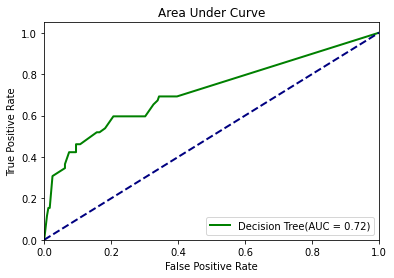

In [166]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
predictions=model_dt.predict(x_test)

In [62]:
len(predictions), len(y_test)

(294, 294)

In [23]:
# predictions.sum() < y_test.sum(), there may be some False negatives in predictions
predictions.sum(), y_test.sum() 

(40, 46)

In [20]:
# Model Accuracy
print (model_dt.score(x_test, y_test))

0.8231292517006803


In [ ]:
"""Accuracy is good, but recall is the important metric for this problem."""

### Recall

In [26]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0])

In [24]:
# FN-> actual 1s but predicted as 0
false_negatives= np.where((y_test==1) & (predictions==0))
false_negatives[0]

array([  1,   7,   8,   9,  22,  42,  43,  52,  60,  61,  62,  69,  71,
        76, 135, 160, 169, 181, 186, 196, 222, 225, 226, 239, 246, 248,
       270, 288, 290], dtype=int64)

In [25]:
len(false_negatives[0])

29

In [27]:
true_positives= np.where((y_test==1) & (predictions==1))
len(true_positives[0])

17

In [28]:
# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

0.3695652173913043

In [30]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        zipped=list(zip(test_class_set,predictions))
        count00=0
        count01=0
        count10=0
        count11=0
        for i in zipped:
            if i==(0,0):
                count00+=1
            elif i==(0,1):
                count01+=1
            elif i==(1,0):
                count10+=1
            elif i==(1,1):
                count11+=1

        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set, # Values to group by in the rows
                                        columns = predictions) # Values to group by in the columns
      
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

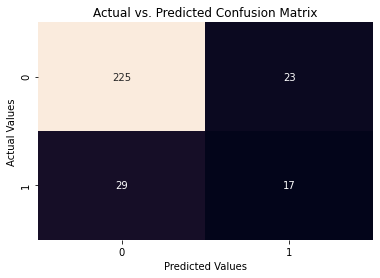

In [31]:
conf_mat = create_conf_mat(y_test, predictions) 
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False) #cbar-Whether to draw a colorbar.
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [662]:
"""0.3695 is a very poor recall"""

### Oversampling the positive cases to increase recall

In [95]:
len(y_train), sum(y_train), sum(y_train)/len(y_train)

(1176, 188, 0.1598639455782313)

In [97]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
# define oversampling strategy
oversampler = RandomOverSampler(sampling_strategy=0.5)

In [52]:
x_oversample, y_oversample = oversampler.fit_sample(x_train, y_train)

In [53]:
# initially 16% of y_train was 1
len(y_train), sum(y_train), sum(y_train)/len(y_train)

(1176, 198, 0.1683673469387755)

In [54]:
# now 33.33% of training set has 1
len(y_oversample), sum(y_oversample), sum(y_oversample)/len(y_oversample)

(1467, 489, 0.3333333333333333)

In [102]:
np.random.seed(42)
start = time.time()

param_dict = {'max_depth': [15, 19, 20, 21, 23, 24, 25, 26],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# model_dt is the DecisionTree object
cv_dt = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_dt.fit(x_oversample, y_oversample) 
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  132.25


In [55]:
model_dt.set_params(criterion= 'gini', max_depth=15, max_features=None, min_samples_leaf= 1, 
                    min_samples_split= 2)
model_dt.fit(x_oversample, y_oversample)

DecisionTreeClassifier(max_depth=15, random_state=1)

In [56]:
model_dt_score_train = model_dt.score(x_oversample, y_oversample)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9993183367416496
Testing score:  0.7993197278911565


In [57]:
predictions=model_dt.predict(x_test)

# FN-> actual 1s but predicted as 0
false_negatives= np.where((y_test==1) & (predictions==0))
false_negatives[0]

array([ 22,  29,  35,  56,  58,  59,  64,  90, 103, 106, 110, 113, 116,
       127, 138, 147, 168, 182, 188, 193, 199, 225, 233, 235, 241, 244,
       254], dtype=int64)

In [58]:
len(false_negatives[0])

27

In [59]:
true_positives= np.where((y_test==1) & (predictions==1))
len(true_positives[0])

12

In [60]:
# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

0.3076923076923077

In [61]:
model_dt.cost_complexity_pruning_path(x_oversample, y_oversample)

{'ccp_alphas': array([0.        , 0.0006492 , 0.00066418, 0.00066441, 0.00066543,
        0.00067281, 0.00090888, 0.00102249, 0.00102249, 0.00102249,
        0.00102249, 0.00109066, 0.00109066, 0.00113611, 0.00113611,
        0.00116857, 0.00116857, 0.00116857, 0.00121185, 0.00122699,
        0.00122699, 0.00125426, 0.00126595, 0.00127244, 0.00129157,
        0.00129157, 0.00129516, 0.0013034 , 0.00130652, 0.00131464,
        0.00133628, 0.00134079, 0.00134515, 0.00170416, 0.00181777,
        0.00184049, 0.001924  , 0.00192986, 0.00193004, 0.00193418,
        0.00194761, 0.00194761, 0.00202876, 0.00204499, 0.00211831,
        0.00212364, 0.00215262, 0.0021791 , 0.00221412, 0.00221942,
        0.00227737, 0.00230643, 0.00230717, 0.00230717, 0.00231154,
        0.00243451, 0.00247461, 0.00248955, 0.0025536 , 0.00258682,
        0.00266346, 0.00276074, 0.00280903, 0.0028469 , 0.00286299,
        0.00290799, 0.00309086, 0.00309178, 0.00317903, 0.00368098,
        0.00377291, 0.00391162, 0.

In [62]:
alphas=model_dt.cost_complexity_pruning_path(x_oversample, y_oversample)['ccp_alphas']
alphas

array([0.        , 0.0006492 , 0.00066418, 0.00066441, 0.00066543,
       0.00067281, 0.00090888, 0.00102249, 0.00102249, 0.00102249,
       0.00102249, 0.00109066, 0.00109066, 0.00113611, 0.00113611,
       0.00116857, 0.00116857, 0.00116857, 0.00121185, 0.00122699,
       0.00122699, 0.00125426, 0.00126595, 0.00127244, 0.00129157,
       0.00129157, 0.00129516, 0.0013034 , 0.00130652, 0.00131464,
       0.00133628, 0.00134079, 0.00134515, 0.00170416, 0.00181777,
       0.00184049, 0.001924  , 0.00192986, 0.00193004, 0.00193418,
       0.00194761, 0.00194761, 0.00202876, 0.00204499, 0.00211831,
       0.00212364, 0.00215262, 0.0021791 , 0.00221412, 0.00221942,
       0.00227737, 0.00230643, 0.00230717, 0.00230717, 0.00231154,
       0.00243451, 0.00247461, 0.00248955, 0.0025536 , 0.00258682,
       0.00266346, 0.00276074, 0.00280903, 0.0028469 , 0.00286299,
       0.00290799, 0.00309086, 0.00309178, 0.00317903, 0.00368098,
       0.00377291, 0.00391162, 0.00399229, 0.00402713, 0.00416

In [ ]:
"""recall hasn't improved. 
Instead of 33% positive cases in y_oversample, lets try with 50%."""

In [50]:
# define oversampling strategy
oversampler = RandomOverSampler(sampling_strategy='minority')
x_oversample, y_oversample = oversampler.fit_sample(x_train, y_train)
len(y_oversample), sum(y_oversample), sum(y_oversample)/len(y_oversample)

(1982, 991, 0.5)

In [122]:
np.random.seed(42)
start = time.time()

param_dict = {'max_depth': [15, 19, 20, 21, 23, 24, 25, 26],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# model_dt is the DecisionTree object
cv_dt = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_dt.fit(x_oversample, y_oversample) 
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
Time taken in grid search:  138.73


In [52]:
model_dt.set_params(criterion="gini",max_depth= 19, max_features="log2", min_samples_leaf= 1, min_samples_split=3)
model_dt.fit(x_oversample, y_oversample)
model_dt_score_train = model_dt.score(x_oversample, y_oversample)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  1.0
Testing score:  0.7993197278911565


In [54]:
predictions=model_dt.predict(x_test)

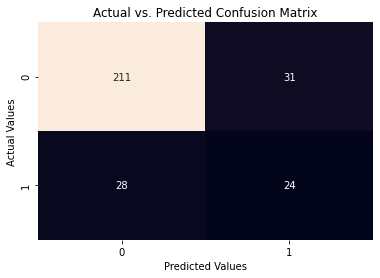

In [55]:
conf_mat = create_conf_mat(y_test, predictions) 
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False) #cbar-Whether to draw a colorbar.
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [53]:
predictions=model_dt.predict(x_test)
false_negatives= np.where((y_test==1) & (predictions==0)) # FN-> actual 1s but predicted as 0
true_positives= np.where((y_test==1) & (predictions==1))
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0])) # Recall = TP/TP+FN

0.46153846153846156

In [ ]:
"""recall is still low"""

### Trying with Random Forest

In [32]:
fit_rf = RandomForestClassifier(random_state=42) # n_estimators=100 by default (number of trees)

In [186]:
np.random.seed(42)
start = time.time()

param_dict = {'max_depth': [10,11,12],
              'min_samples_leaf': [3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(fit_rf, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_dt.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4}
Time taken in grid search:  283.31


In [33]:
fit_rf.set_params(criterion='gini', max_depth=10, max_features=None, min_samples_leaf=4)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       random_state=42)

In [188]:
# oob_score : default=False Whether to use out-of-bag samples to estimate the accuracy.
fit_rf.set_params(warm_start=False, oob_score=True)

min_estimators = 26
max_estimators = 300

error_rate = {} #dictionary

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_oversample,y_oversample)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

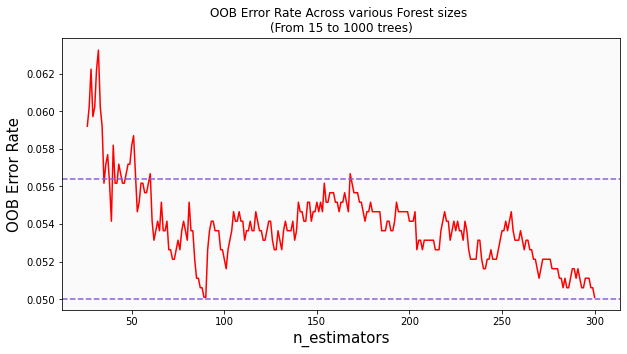

In [193]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.050, color='#875FDB',linestyle='--')
plt.axhline(0.0564, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [228]:
# OOB Error rate for 90 trees is: 0.0501
fit_rf.set_params(n_estimators=90, max_depth=10, bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       n_estimators=90, random_state=42)

In [230]:
# building the RF with above configuration, fitting the training set and checking the scores
fit_rf.fit(x_train, y_train)
predictions_rf = fit_rf.predict(x_test)

fit_rf_score_train = fit_rf.score(x_train, y_train)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)

true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.9302721088435374
Testing score:  0.8469387755102041


0.1836734693877551

In [ ]:
"""poor recall, lets try oversampling on the same forest."""

In [36]:
# define oversampling strategy
oversampler = RandomOverSampler(sampling_strategy='minority')
x_oversample, y_oversample = oversampler.fit_resample(x_train, y_train)
len(y_oversample), sum(y_oversample), sum(y_oversample)/len(y_oversample)

(1970, 985, 0.5)

In [202]:
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.9878542510121457
Testing score:  0.8197278911564626


0.2653061224489796

In [ ]:
"""still poor recall. Pruning RF introduces bias, but recall slightly increases."""

In [205]:
# pruning RF (reducing max_depth from 10 to 9)
fit_rf.max_depth=9
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.986336032388664
Testing score:  0.8163265306122449


0.2857142857142857

In [206]:
# pruning down further
fit_rf.max_depth=8
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.9772267206477733
Testing score:  0.8129251700680272


0.2857142857142857

In [207]:
# pruning down further to see if there is any improvement in recall
fit_rf.max_depth=7
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)

fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)

true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.9600202429149798
Testing score:  0.8231292517006803


0.3673469387755102

In [208]:
# pruning down further to see if there is any improvement in recall
fit_rf.max_depth=6
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.9281376518218624
Testing score:  0.826530612244898


0.40816326530612246

In [209]:
# pruning down further to see if there is any improvement in recall
fit_rf.max_depth=5
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.8881578947368421
Testing score:  0.826530612244898


0.46938775510204084

In [372]:
# pruning down further to see if there is any improvement in recall
fit_rf.max_depth=4
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)

fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)

true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.8173076923076923
Testing score:  0.8095238095238095


0.5510204081632653

In [ ]:
# recall: 0.55, training accuracy: 0.817, test accuracy: 0.809 
# achieved with RF using below configuration:
# max_depth=4, max_features=None, criterion:'gini', bootstrap = True, min_samples_leaf=4, n_estimators=90
# oversampler = RandomOverSampler(sampling_strategy='minority')

"""pruning down isn't increasing recall score"""

In [369]:
fit_rf.max_depth=3
fit_rf.fit(x_oversample, y_oversample)
predictions_rf = fit_rf.predict(x_test)
fit_rf_score_train = fit_rf.score(x_oversample, y_oversample)
print("Training score: ",fit_rf_score_train)
fit_rf_score_test = fit_rf.score(x_test, y_test)
print("Testing score: ",fit_rf_score_test)
true_positives= np.where((y_test==1) & (predictions_rf==1))
false_negatives= np.where((y_test==1) & (predictions_rf==0))

# Recall = TP/TP+FN
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0]))

Training score:  0.7550607287449392
Testing score:  0.7551020408163265


0.5306122448979592

### Trying PCA

In [37]:
# standardizing before scaling
scaler=StandardScaler() # Standardize features by removing the mean and scaling to unit variance
# standard score of a sample `x` is z = (x - u) / s

scaler.fit(x_oversample) # Compute the mean and std to be used for later scaling
x_oversample_scaled = scaler.transform(x_oversample) # Perform standardization 
x_test_scaled = scaler.transform(x_test)

In [251]:
x_oversample  # original

array([[  38,    2,  903, ...,    5,    2,    1],
       [  36,    2, 1218, ...,    5,    3,    0],
       [  46,    2,  150, ...,    6,    3,    1],
       ...,
       [  35,    2,  763, ...,    2,    2,    2],
       [  31,    2,  330, ...,   10,    2,    6],
       [  39,    2,  895, ...,    1,    0,    0]], dtype=int64)

In [255]:
x_oversample_scaled  # scaled version, with mean=0 and variance=1

array([[ 0.25201618,  0.63862168,  0.26204069, ..., -0.17824229,
        -0.45748285, -0.34113067],
       [ 0.04430649,  0.63862168,  1.05043889, ..., -0.17824229,
        -0.16755786, -0.64822598],
       [ 1.08285492,  0.63862168, -1.62260643, ..., -0.0151836 ,
        -0.16755786, -0.34113067],
       ...,
       [-0.05954835,  0.63862168, -0.08835851, ..., -0.66741834,
        -0.45748285, -0.03403536],
       [-0.47496772,  0.63862168, -1.17209317, ...,  0.63705113,
        -0.45748285,  1.19434587],
       [ 0.35587102,  0.63862168,  0.24201788, ..., -0.83047702,
        -1.03733283, -0.64822598]])

In [276]:
x_oversample_scaled.shape

(1976, 25)

In [38]:
pca=PCA()
pca.fit(x_oversample_scaled) 
x_oversample_pca = pca.transform(x_oversample_scaled) 
x_test_pca = pca.transform(x_test_scaled) 

In [308]:
x_oversample_pca.shape

(1976, 25)

In [309]:
ex_variance = np.var(x_oversample_pca,axis=0)
ex_variance  # variance of each PCA

array([3.70945002, 1.93287415, 1.62819777, 1.46799994, 1.26121006,
       1.21130553, 1.17874184, 1.09700863, 1.05671422, 1.00531486,
       0.9908412 , 0.94548286, 0.94191413, 0.90754239, 0.89425591,
       0.82344621, 0.80888508, 0.76729296, 0.72679282, 0.47254146,
       0.39178998, 0.29802087, 0.26318332, 0.17713375, 0.04206004])

In [310]:
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio)  # % of variance explained by each PCA

[0.148378   0.07731497 0.06512791 0.05872    0.0504484  0.04845222
 0.04714967 0.04388035 0.04226857 0.04021259 0.03963365 0.03781931
 0.03767657 0.0363017  0.03577024 0.03293785 0.0323554  0.03069172
 0.02907171 0.01890166 0.0156716  0.01192083 0.01052733 0.00708535
 0.0016824 ]


In [311]:
sum(ex_variance_ratio)

0.9999999999999999

In [327]:
cum_variance=[]
for i in range(len(ex_variance_ratio)):
    cum_variance.append(sum(ex_variance_ratio[:i+1]))
print(cum_variance)

[0.14837800090443776, 0.22569296705568914, 0.29082087787781175, 0.3495408755526458, 0.3999892777650073, 0.44844149880891276, 0.49559117224406735, 0.5394715176150299, 0.5817400863292822, 0.6219526806823382, 0.6615863286997491, 0.6994056430699277, 0.7370822082233847, 0.77338390383956, 0.8091541402713162, 0.8420919888294386, 0.8744473921825611, 0.9051391106271892, 0.9342108233892779, 0.9531124816501805, 0.9687840807720273, 0.980704915552934, 0.9912322482750788, 0.9983175982136644, 0.9999999999999999]


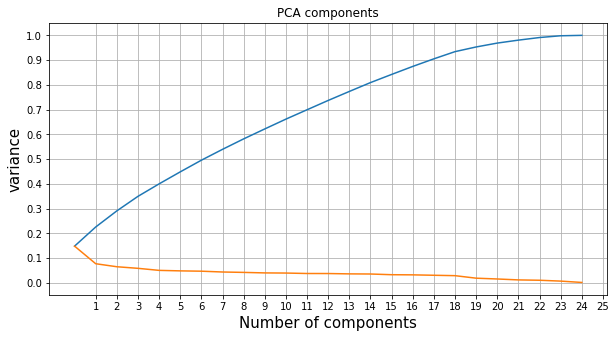

In [332]:
# how many PCAs to be chosen?
plt.figure(figsize=(10, 5))
plt.plot(cum_variance)
plt.plot(ex_variance_ratio)
plt.title('PCA components')
plt.xticks(np.arange(1,26)); plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('Number of components')
plt.ylabel('variance'); plt.grid()

In [ ]:
# Let's consider 90% of total variance.

"""first 17 PCAs contributes to 90% of total variance"""

## K-Nearest Neighbours Classifier using PCA

In [350]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_oversample_pca[:,:17], y_oversample) 
    pred_i = knn.predict(x_test_pca[:,:17])
    error.append(np.mean(pred_i != y_test))
print(error)

[0.1870748299319728, 0.1836734693877551, 0.2108843537414966, 0.20068027210884354, 0.25510204081632654, 0.25510204081632654, 0.29591836734693877, 0.2891156462585034, 0.29931972789115646, 0.24149659863945577, 0.2653061224489796, 0.24489795918367346, 0.2585034013605442, 0.23129251700680273, 0.2585034013605442, 0.22789115646258504, 0.2585034013605442, 0.23809523809523808, 0.25510204081632654, 0.24149659863945577, 0.25170068027210885, 0.21768707482993196, 0.25170068027210885, 0.23129251700680273, 0.2619047619047619, 0.25170068027210885, 0.25170068027210885, 0.22448979591836735, 0.22108843537414966, 0.2108843537414966, 0.23129251700680273, 0.22789115646258504, 0.22448979591836735, 0.21768707482993196, 0.22789115646258504, 0.22108843537414966, 0.22789115646258504, 0.21768707482993196, 0.23469387755102042]


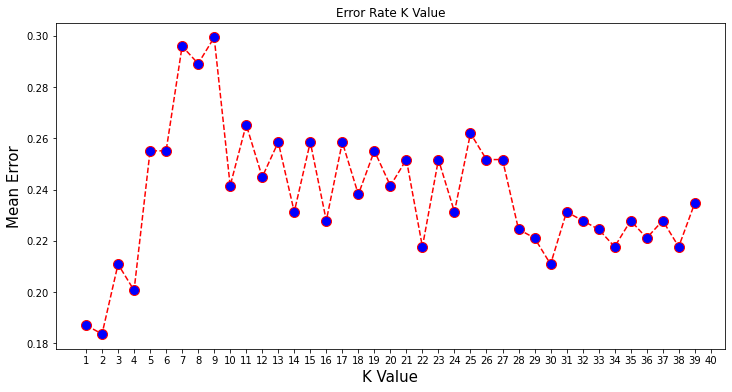

In [351]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.xticks(np.arange(1,41,1))
plt.show()

In [371]:
knn = KNeighborsClassifier(11) # taking K=11

knn.fit(x_oversample_pca[:,:17], y_oversample) 
pred = knn.predict(x_test_pca[:,:17])

print("Training score: ", knn.score(x_oversample_pca[:,:17], y_oversample))
print("Testing score: ", knn.score(x_test_pca[:,:17],y_test))

true_positives= np.where((y_test==1) & (pred==1))
false_negatives= np.where((y_test==1) & (pred==0))
len(true_positives[0])/(len(true_positives[0])+ len(false_negatives[0])) # Recall = TP/TP+FN

Training score:  0.8421052631578947
Testing score:  0.7346938775510204


0.5510204081632653

### Modelling Results for Attrition=Yes/No Classification

Decision Tree with Oversampling
    Training score:  1.0
    Testing score:  0.806
    Recall:   0.306

Random Forest with Oversampling
    Training score:  0.817
    Testing score:  0.8095
    Recall: 0.551

KNN with PCA applied on Oversampling 
    Training score:  0.842
    Testing score:  0.73469
    Recall: 0.551

<div>
    </br>
    <span style="font-size:19px">
These models are tuned for higher recall. </br>
Even though these models can be tuned to better accuracy, the key metric to consider here is Recall.</br>
Model with higher recall can predict more employees with a chance for attrition.</br>
    </br>
Also, getting data of more attrite employees, </br>
ie, adding more data rows of [Attrition='Yes'] category employees in the dataset may give a better recall.</span></div>